<a href="https://colab.research.google.com/github/RichardLiuCoding/Publications/blob/main/MOBO_DKL_Experiment_Results_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
# You will need to restart the notebook after executing this cell
# After restarting, you can skip or comment out this cell
!pip install gpytorch
!pip install botorch
!pip install aespm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.9/279.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.9/779.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 30.6 MB/s eta 0:00:00
  Attempting uninstall: gpytorch
    Found existing installation: gpytorch 1.14.2
    Uninstalling gpytorch-1.14.2:
      Successfully uninstalled gpytorch-1.14.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.9/223.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
!gdown 1SdA4intre7XGMYrUK04oX4gT5hgcnx5H
!gdown 1zpuBTsQ2eXrNmzxFXa4RFOwPyvJ_ExL4
!gdown 1jAFIJhL0xibDJRcMPu7hhG39YwgGzn0h

Downloading...
From: https://drive.google.com/uc?id=1SdA4intre7XGMYrUK04oX4gT5hgcnx5H
To: /content/PZTO_test_0008.ibw
100% 512k/512k [00:00<00:00, 46.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1zpuBTsQ2eXrNmzxFXa4RFOwPyvJ_ExL4
From (redirected): https://drive.google.com/uc?id=1zpuBTsQ2eXrNmzxFXa4RFOwPyvJ_ExL4&confirm=t&uuid=fda4a022-bff0-478f-ba62-dcdf7e2e0a97
To: /content/20250522_PTKTO_DW4.pickle
100% 498M/498M [00:07<00:00, 65.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jAFIJhL0xibDJRcMPu7hhG39YwgGzn0h
To: /content/20250514_PZTO_DW1.pickle
100% 27.3M/27.3M [00:00<00:00, 68.9MB/s]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'Arial'
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
import torch
import torch.nn as nn
from botorch.models.model import Model
from botorch.models.gpytorch import GPyTorchModel
from botorch.acquisition.multi_objective.monte_carlo import qExpectedHypervolumeImprovement
from botorch.optim import optimize_acqf
# from botorch.utils.multi_objective.box_decomposition import NondominatedPartitioning
from botorch.utils.sampling import sample_simplex
from botorch.sampling.normal import SobolQMCNormalSampler
from botorch.test_functions.multi_objective import BraninCurrin
from gpytorch.models import ApproximateGP
from gpytorch.variational import CholeskyVariationalDistribution, VariationalStrategy
from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel
from gpytorch.mlls.variational_elbo import VariationalELBO
from gpytorch.likelihoods import GaussianLikelihood
from torch.optim import Adam
from botorch.models.model_list_gp_regression import ModelListGP
from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement
from botorch.optim import optimize_acqf_discrete
from botorch.acquisition.multi_objective import ExpectedHypervolumeImprovement
from botorch.utils.multi_objective.box_decompositions.non_dominated import FastNondominatedPartitioning

from botorch.models.gp_regression import SingleTaskGP
from botorch.models.model_list_gp_regression import ModelListGP
from botorch.models.transforms.outcome import Standardize
from gpytorch.mlls.sum_marginal_log_likelihood import SumMarginalLogLikelihood
from botorch.utils.transforms import unnormalize, normalize
from botorch.utils.sampling import draw_sobol_samples

from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement

from botorch.optim.optimize import optimize_acqf, optimize_acqf_list
from botorch.acquisition.objective import GenericMCObjective
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization
from botorch.utils.multi_objective.box_decompositions.non_dominated import (
    FastNondominatedPartitioning,
)
from botorch.acquisition.multi_objective.monte_carlo import (
    qExpectedHypervolumeImprovement,
    qNoisyExpectedHypervolumeImprovement,
)
from botorch.utils.sampling import sample_simplex

import time
import warnings

# from botorch.exceptions import BadInitialCandidatesWarning
from botorch.sampling.normal import SobolQMCNormalSampler
from botorch.utils.multi_objective.box_decompositions.dominated import (
    DominatedPartitioning,
)
from botorch.utils.multi_objective.pareto import is_non_dominated

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.float64
torch.set_default_dtype(dtype)

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import os
import time
import pickle
import cv2
# import stmpy

import aespm as ae


# Custom functions

## Experiment class

In [4]:
import types

class Experiment(object):
    '''
    Experiment data structure for SPM auto-optimization simulation.
    '''
    def __init__(self):
        super(Experiment, self).__init__()

        # Initialize parameter dict
        self.param = {}

        # Initialize action list of custom functions
        self.action_list = {}

    def update_param(self, key, value):
        '''
        Update the value stored in obj.param

        Input:
            key     - List: keys to be modifies in obj.param
            value   - List: values to be entered in obj.param['key']

        Output:
            N/A

        Usage:
            obj.update_param(key=['DriveAmplitude', 'Setpoint'], value=[0.1, 0.2])
        '''
        if type(key) is not list:
            key = [key]

        if len(key) == 1:
            self.param[key[0]] = value

        else:
            for i, ix in enumerate(key):
                self.param[ix] = value[i]

    def add_func(self, NewFunc, log=True):
        '''
        Add a custom function as the method to Experiment object.

        Input:
            NewFunc - Function: Custom function defined by user. This function has aceess
                        to all the attributes and methods of obj
        Output:
            N/A
        Usage:
            def measure(self, operation, key, value):
                self.update_param(key=key, value=value)
                self.execute(operation)
            obj.add_func(measure)
        '''
        # method_name = NewFunc.__name__
        # setattr(self, method_name, NewFunc)
        # getattr(self, method_name).__doc__ = NewFunc.__doc__

        # # add new function name to the custom action list
        # self.action_list.append(method_name)

        method_name = NewFunc.__name__

        # add new function name to the custom action list
        self.action_list[method_name] = method_name

        # Bind the function as a method of the instance
        bound_method = types.MethodType(NewFunc, self)

        # # Optionally, update the docstring (if necessary)
        # getattr(self, method_name).__doc__ = NewFunc.__doc__

        # Set the method to the instance
        setattr(self, method_name, bound_method)

    def execute(self, action, value=None, wait=None, log=True, **kwargs):
        '''
        A wrapper of spm_control() function.

        Input:
            action      - String: SPM instructions in hyper-language.
            value       - Int/Float/String: New value for the parameter to change.
            wait        - Float: sleep time after the action is finished.
            log         - Boolean: If true, this action will be logged in obj.log
            kwargs      - Keyword arguments for custom functions

        Return:
            N/A

        Examples:
            # Start a downward scan
            obj.execute(action='ScanDown')
            # Change scan rate to 1 Hz
            obj.execute(action='ScanRate', value=1)
        '''

        wait = 0.35 if wait is None else wait
        if wait <= 0.35:
            wait = 0.35

        # custom functions
        if action in self.action_list:
            if value == None:
                return getattr(self, action)()
            else:
                if type(value) != list and type(value) != np.ndarray:
                    value = [value]
                return getattr(self, action)(*value, **kwargs)
            time.sleep(wait)

        # default action list
        else:
            if type(value) != list and type(value) != np.ndarray:
                value = [value]

## MOBO DKL class

In [5]:
import gpytorch
from botorch.posteriors.gpytorch import GPyTorchPosterior
from gpytorch.models import ApproximateGP
from gpytorch.variational import CholeskyVariationalDistribution, VariationalStrategy
import math
import torch.nn as nn
import numpy as np
from typing import Tuple, Optional, Dict, Union, List
import numpy as np
import torch

# Simple ConvNet for feature extraction
class ConvNetFeatureExtractor(nn.Module):
    def __init__(self, input_channels=1, output_dim=32):
        super(ConvNetFeatureExtractor, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(input_channels, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.output_dim = output_dim
        self.fc = None  # Placeholder for the fully connected layer

    def forward(self, x):
        if len(x.shape) == 3: # TODO: hacky way to make sure botorch acquisition function works
            # flatten
            batch_size, channel, mn = x.shape[0], x.shape[1] , x.shape[2]
            d = math.sqrt(mn)      ## TODO: what if mn is not a perfect square?
            x = x.reshape(int(batch_size), int(channel), int(d), int(d))
        # Pass through the convolutional layers
        x = self.conv_layers(x)

        # If the fully connected layer is not defined yet, initialize it dynamically******************key
        if self.fc is None:
            flattened_size = x.view(x.size(0), -1).size(1)
            device = x.device# TODO: better way to handle device
            self.fc = nn.Linear(flattened_size, self.output_dim).to(device)  # Create fc layer on the correct device

        # Flatten for fully connected layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# GP model with deep kernel using ConvNet feature extractor
class GPModelDKL(ApproximateGP, Model):
    def __init__(self, inducing_points, likelihood, feature_extractor=None, input_shape=(1, 5, 5)):
        self.input_shape = input_shape

        # Transform inducing points first
        flat_inducing = self._flatten_input(inducing_points)
        feature_inducing = feature_extractor(self._reshape_to_patch(flat_inducing))
        # No need to reshape feature_inducing as it's already in correct shape

        variational_distribution = CholeskyVariationalDistribution(feature_inducing.size(0))
        variational_strategy = VariationalStrategy(
            self, feature_inducing, variational_distribution, learn_inducing_locations=True
        )

        super().__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        self._num_outputs = 1  # storing as private attribute
        self.likelihood = likelihood
        self.feature_extractor = feature_extractor

    def _flatten_input(self, x):
        """Flatten input to include channel dim"""
        if x.ndim == 4:  # (batch, channel, height, width)
            return x.reshape(x.size(0), 1, -1)
        return x

    def _reshape_to_patch(self, x):
        """Reshape flattened input to patch format"""
        if x.ndim == 3:  # (batch, channel, flattened)
            batch_size = x.size(0)
            return x.reshape(batch_size, *self.input_shape)
        return x

    def forward(self, x):
        # x should already be features at this point
        mean = self.mean_module(x)
        covar = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean, covar)

    def __call__(self, x, use_feature_extractor=True, *args, **kwargs):
        if use_feature_extractor:
            # First ensure x is in patch format
            x = self._reshape_to_patch(x)
            # Get features - these will be [batch_size, feature_dim]
            x = self.feature_extractor(x)
            # No need to reshape after feature extraction
        return super().__call__(x, *args, **kwargs)

    def posterior(self, X, output_indices=None, observation_noise=False, *args, **kwargs):
        self.eval()
        with torch.no_grad():
            # Ensure correct shape for feature extraction
            if X.ndim == 2:  # If input is (batch_size, flattened_dim)
                X = X.unsqueeze(1)  # Add channel dim
            X = self._reshape_to_patch(X)
            # Features will be [batch_size, feature_dim]
            features = self.feature_extractor(X)
            dist = self.likelihood(self(features, use_feature_extractor=False))
            # Ensure output has correct shape for MOBO
            mean = dist.mean.unsqueeze(-1)  # Shape: [batch_size, 1]
            variance = dist.variance.unsqueeze(-1)  # Shape: [batch_size, 1]
            dist = gpytorch.distributions.MultivariateNormal(mean, torch.diag_embed(variance))
        return GPyTorchPosterior(dist)

    @property
    def num_outputs(self) -> int:
        """The number of outputs of the model."""
        return self._num_outputs

    @property
    def hparam_dict(self):
        return {
            "likelihood.noise": self.likelihood.noise.item(),
            "covar_module.base_kernel.outputscale": self.covar_module.base_kernel.outputscale.item(),
            "mean_module.constant": self.mean_module.constant.item(),
        }

## MOBO DKL helper functions

In [6]:
from botorch.utils.multi_objective.pareto import is_non_dominated

def embeddings_and_predictions(model, patches, device="cpu") -> (torch.Tensor, torch.Tensor):
    """
    Get predictions from the trained model
    """
    model.eval()
    patches = patches.to(device)
    with torch.no_grad():
        predictions = model(patches)
        embeddings = model.feature_extractor(patches).view(patches.size(0), -1).cpu().numpy()
    return predictions, embeddings

def load_image_and_features(img: np.ndarray , window_size : int) -> (np.ndarray, np.ndarray):
    coordinates = ae.tools.get_coord_grid(img, step=1, return_dict=False)
    features_all, coords, _ = ae.tools.extract_subimages(img, coordinates, window_size)
    features_all = features_all[:, :, :, 0]
    coords = np.array(coords, dtype=int)
    norm_ = lambda x: (x - x.min()) / np.ptp(x) # or use:  norm_ = lambda x: (x - np.min(x)) / np.ptp(x) --> numpy-2.0 upgrade
    # norm_ = lambda x: (x - np.mean(x)) / np.ptp(x) # or use:  norm_ = lambda x: (x - np.min(x)) / np.ptp(x) --> numpy-2.0 upgrade

    features = norm_(features_all)
    return features, coords# shapes (3366, 5, 5) and (3366, 2)

def normalize_data(data):  # Expected data type: torch.Tensor
    """Normalize data to the [0, 1] range."""
    # return (data - np.mean(data)) / (data.max() - data.min())

    return (data - data.min()) / (data.max() - data.min())

# norm_ = lambda x: (x-np.mean(x)) / (x.max()-x.min())

norm_ = lambda x: (x-x.min) / (x.max()-x.min())

def numpy_to_torch_for_conv(np_array) -> torch.Tensor:
    """
    Converts a NumPy array of shape (batch_size, a, b) to a PyTorch tensor
    with shape (batch_size, 1, a, b) for neural network use.

    Parameters:
        np_array (np.ndarray): Input NumPy array of shape (batch_size, a, b).

    Returns:
        torch.Tensor: Converted PyTorch tensor of shape (batch_size, 1, a, b).
    """
    # Check if input is a numpy array
    if not isinstance(np_array, np.ndarray):
        raise TypeError("Input must be a NumPy array.")

    # Convert to PyTorch tensor and add a channel dimension
    # tensor = torch.from_numpy(np_array, dtype=torch.double)  # Convert to float tensor
    tensor = torch.tensor(np_array, dtype=dtype)  # Convert to float tensor
    tensor = tensor.unsqueeze(1)  # Add a channel dimension at index 1

    return tensor

## MOBO rewards (original)

### Helper functions

In [7]:
def bilateral_smooth(data, d=5, sigma_color=75, sigma_space=10):
    """
    Applies bilateral filtering to preserve edges while smoothing.

    Parameters:
    - data: 2D numpy array (float32 or uint8)
    - d: Diameter of each pixel neighborhood.
    - sigma_color: Filter sigma in the color space (intensity similarity).
    - sigma_space: Filter sigma in the coordinate space (spatial proximity).

    Returns:
    - Smoothed 2D array.
    """
    if data.dtype != np.uint8:
        # Normalize and convert to uint8 for OpenCV
        data_uint8 = cv2.normalize(data, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        result = cv2.bilateralFilter(data_uint8, d, sigma_color, sigma_space)
        # Rescale back to original range
        return cv2.normalize(result.astype(np.float32), None, data.min(), data.max(), cv2.NORM_MINMAX)
    else:
        return cv2.bilateralFilter(data, d, sigma_color, sigma_space)


def find_largest_connected_component(mask, prefer_center=True):
    """
    Finds the largest connected component in a binary mask.
    Optionally prefers components near the center.

    Parameters:
    - mask: 2D binary array (0/1 or 0/255)
    - prefer_center: if True, select large region closest to center

    Returns:
    - largest_component_mask: binary mask of selected component
    - label_id: integer label of the selected component
    """
    # Ensure binary mask is uint8
    mask = (mask > 0).astype(np.uint8)

    # Connected component labeling
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

    if num_labels <= 1:
        return np.zeros_like(mask), -1  # No components found

    # Image center
    h, w = mask.shape
    center = np.array([w / 2, h / 2])

    # Exclude background (label 0)
    areas = stats[1:, cv2.CC_STAT_AREA]
    dists = np.linalg.norm(centroids[1:] - center, axis=1)

    if prefer_center:
        # Normalize and rank by large area & proximity to center
        area_rank = (areas - areas.min()) / (np.ptp(areas) + 1e-8)
        dist_rank = 1 - (dists - dists.min()) / (np.ptp(dists) + 1e-8)
        score = 0.5 * area_rank + 0.5 * dist_rank
        best_idx = np.argmax(score)
    else:
        best_idx = np.argmax(areas)

    label_id = best_idx + 1  # Offset by 1 due to background
    largest_component_mask = (labels == label_id).astype(np.uint8)

    return largest_component_mask, label_id

import numpy as np
from scipy.ndimage import gaussian_filter

def gaussian_center_sum(patch, D):
    """
    Apply a Gaussian filter centered on the patch and sum the result.

    Args:
        patch (ndarray): Input NxN image patch.
        D (float): Standard deviation (width) of the Gaussian.

    Returns:
        float: Sum of the patch weighted by a central Gaussian.
    """
    N = patch.shape[0]
    assert patch.shape[0] == patch.shape[1], "Patch must be square"

    # Create coordinates
    x = np.linspace(-1, 1, N)
    xv, yv = np.meshgrid(x, x)
    r2 = xv**2 + yv**2

    # Create Gaussian weight mask
    gaussian_mask = np.exp(-r2 / (2 * (D/N)**2))
    gaussian_mask /= gaussian_mask.sum()  # Normalize if desired

    # Apply mask and sum
    weighted_sum = np.sum(patch * gaussian_mask)
    return weighted_sum

import numpy as np
from scipy.spatial import distance_matrix

def remove_non_connecting(x, y, radius=2):
    # Example: your group of points as x, y arrays
    # Combine into a (N, 2) array of (x, y) coordinates
    points = np.column_stack((x, y))

    # Compute all pairwise distances
    dists = distance_matrix(points, points)

    # Set diagonal to infinity to ignore self-distance
    np.fill_diagonal(dists, np.inf)

    # Find points that have at least one neighbor within the radius
    has_neighbor = (dists < radius).any(axis=1)

    # Filter points to only those with neighbors
    filtered_points = points[has_neighbor]

    # Optional: separate back into x, y
    x_filtered, y_filtered = filtered_points[:, 0], filtered_points[:, 1]
    return x_filtered, y_filtered

def compute_symmetry_score(x, y):

    # Use centroid as approximate center
    cx, cy = np.mean(x), np.mean(y)

    # Get radius from each point
    radii = np.sqrt((x - cx)**2 + (y - cy)**2)

    # Compute standard deviation of radii
    symmetry_score = np.std(radii) / np.mean(radii)

    return symmetry_score

### Original rewards

In [8]:
def reward_mobo_original(self, obj1, obj2, mask_on=True, trace=False, radius=20, thres=100):
    '''
    Compute multiple rewards from the obj.
    This one uses the switched domain size and symmetry.
    '''
    ind = [[0,0], [-1,-1], [0,-1], [-1,0]]

    phase1, phase2 = obj1.data[4], obj2.data[4]
    amp1 = obj1.data[2] * np.cos(phase1/180*np.pi) * 1e9
    amp2 = obj2.data[2] * np.cos(phase2/180*np.pi) * 1e9

    t1, t2 = np.shape(phase1)
    X, Y = np.meshgrid(np.arange(t1), np.arange(t2))

    center_mask = np.zeros([t1, t2])
    center_mask[np.where((X-t1//2)**2+(Y-t2//2)**2<radius**2)] = 1

    amp_change = np.abs(bilateral_smooth(amp1) - bilateral_smooth(amp2))

    if mask_on:
        index1 = np.where(amp_change * center_mask > self.param['amp_mean'])
    else:
        index1 = np.where(amp_change > self.param['amp_mean'])

    temp = np.zeros_like(amp_change)
    temp[index1] = 1

    mask = find_largest_connected_component(temp)[0]

    index = np.where(np.abs(mask) > 0)

    x, y = remove_non_connecting(index[1], index[0])

    area = len(x)

    if area > 10:
        if compute_symmetry_score(x, y) <=0.1 :
            symmetry = 0.1
        else:
            symmetry = 1 / (compute_symmetry_score(x, y))
    else:
        symmetry = 0.1

    rew_amp = gaussian_center_sum(amp1, D=len(amp1)/4)

    if trace:
        return np.array([rew_amp, area, symmetry]), amp_change, [x, y]
    else:
        return np.array([rew_amp, area, symmetry])

# exp.add_func(reward_mobo_original)


## MOBO rewards (new)

In [9]:
def reward_mobo_new(self, obj1, obj2, mask_on=True, amp_out=True, phase_flip=False,
                    positive=True, trace=False, radius=20, connected=True, thres=100):
    '''
    Compute multiple rewards from the obj.
    This one uses the switched domain size and symmetry.
    '''
    ind = [[0,0], [-1,-1], [0,-1], [-1,0]]

    phase1, phase2 = obj1.data[4], obj2.data[4]

    if phase_flip is not False:
        # phase_mask = np.where(obj1.data[1] * 1e9 > self.param['amp_mean'])
        # phase2 = phase2 - np.mean(np.abs(phase2[phase_mask]-phase1[phase_mask]))
        amp1 = obj1.data[2] * 1e9
        amp2 = obj2.data[2] * 1e9
    else:
        amp1 = obj1.data[2] * np.cos(phase1/180*np.pi) * 1e9
        amp2 = obj2.data[2] * np.cos(phase2/180*np.pi) * 1e9

    t1, t2 = np.shape(phase1)
    X, Y = np.meshgrid(np.arange(t1), np.arange(t2))

    center_mask = np.zeros([t1, t2])
    center_mask[np.where((X-t1//2)**2+(Y-t2//2)**2<radius**2)] = 1

    amp_change = np.abs(bilateral_smooth(amp1) - bilateral_smooth(amp2))

    if mask_on:
        index1 = np.where(amp_change * center_mask > self.param['amp_mean'])
    else:
        index1 = np.where(amp_change > self.param['amp_mean'])

    temp = np.zeros_like(amp_change)
    temp[index1] = 1



    if connected:
        mask = find_largest_connected_component(temp)[0]
        index = np.where(np.abs(mask) > 0)
        x, y = remove_non_connecting(index[1], index[0])
    else:
        x, y = index1

    area = len(x)

    if area > 10:
        temp = 1 / (compute_symmetry_score(x, y) - 0.2)
        if  temp < 0 :
            symmetry = 7.5
        elif temp <= 2.5:
            symmetry = 2.5
        else:
            symmetry = temp
    else:
        symmetry = 2

    if positive:
        rew_amp = gaussian_center_sum(np.abs(amp1), D=len(amp1)/4)
    else:
        rew_amp = gaussian_center_sum(amp1, D=len(amp1)/4)
    if amp_out:
        if trace:
            return np.array([rew_amp, area, symmetry]), amp_change, [x, y]
        else:
            return np.array([rew_amp, area, symmetry])
    else:
        if trace:
            return np.array([area, symmetry]), amp_change, [x, y]
        else:
            return np.array([area, symmetry])

# exp.add_func(reward_mobo_new)


## Train MOBO DKL function

In [10]:
def train_model(self, X_train=None, Y_train=None, feature_extractor=None, acq='qEHVI', num_epochs=50, log_interval=5):

    device = self.param['device']
    dtype = self.param['dtype']
    patches = self.param['patches_all']
    model_list = []

    if X_train is None:
        X_train = torch.stack([patches[idx] for idx in self.param['indices_measured']]).to(device)
    X_train_flat = X_train.reshape(X_train.size(0), 1, -1).to(device)  # Flatten for BoTorch compatibility

    if feature_extractor is None:
        feature_extractor = []
        for i in range(len(self.param['y_measured'][0])):
            feature_extractor.append(ConvNetFeatureExtractor(input_channels=1, output_dim=2).to(device))

    likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)

    for i in range(len(self.param['y_measured'][0])):
        if Y_train is None:
            y_train = torch.tensor(self.param['y_measured'][:, i], dtype=dtype).to(device)
        else:
            y_train = torch.tensor(Y_train[:, i], dtype=dtype).to(device)
        y_train = (y_train - y_train.min()) / (y_train.max() - y_train.min())

        if acq == 'qEHVI':
            window_size = self.param['ws']
            # Use the first 10 points in the feature space to pre-train the GP model
            model = GPModelDKL(
                    inducing_points=X_train_flat[:10],  # Use flattened inducing points
                    likelihood=likelihood,
                    feature_extractor=feature_extractor[i],
                    input_shape=(1, window_size, window_size)  # Specify the original patch shape
                ).to(device)

            model.train()
            likelihood.train()
            optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
            mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

            # for epoch in tqdm(range(1, num_epochs + 1), desc="Training Progress"):
            for epoch in range(num_epochs):
                # Zero gradients from previous iteration
                optimizer.zero_grad()
                output = model(X_train_flat)
                loss = -mll(output, y_train)
                loss.backward()
                optimizer.step()

            model_list.append(model)
        else:
            # Use the first 10 points in the feature space to pre-train the GP model
            inducing_points = X_train[:10]
            model = GPModelDKL(inducing_points=inducing_points, likelihood=likelihood, feature_extractor=feature_extractor).to(device)

            model.train()
            likelihood.train()
            optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
            mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

            # for epoch in tqdm(range(1, num_epochs + 1), desc="Training Progress"):
            for epoch in range(num_epochs):
                # Zero gradients from previous iteration
                optimizer.zero_grad()
                output = model(X_train)
                loss = -mll(output, y_train)
                loss.backward()
                optimizer.step()

            model_list.append(model)
    return model_list

# exp.add_func(train_model)

## Acquisition functions

In [11]:

def compute_acq(exp, step, ):

    num_seed = exp.param['num_seed']
    step = step + num_seed
    window_size = exp.param['ws']

    num_rewards = len(exp.param['rewards'][0])
    patches = exp.param['patches_all']
    candidate_indices = exp.param['indices_all']
    # patches = self.param['patches_all']
    # X_candidates = torch.stack([exp.param['patches_all']]).to(device)
    X_candidates = torch.stack([patches[idx] for idx in np.arange(len(patches))]).to(device)

    X_candidates_flat = X_candidates.reshape(X_candidates.size(0), -1)  # Flatten patches for distance calculation
    X_candidates = X_candidates.reshape(-1, 1, window_size*window_size)

    X_train = torch.stack([exp.param['patches_all'][idx] for idx in exp.param['indices_measured'][:step]]).to(exp.param['device'])
    Y_train = torch.tensor(exp.param['rewards'][:step]).to(exp.param['device'])

    models = exp.train_model(X_train=X_train, Y_train=Y_train)
    # pred, embeddings = exp.model_predict(models, patches=exp.param['patches_pred'])

    ref_point = torch.zeros(num_rewards, device=exp.param['device'])

    model = ModelListGP(*models)  # Properly initialize ModelListGP\
    model.eval()

    partitioning = FastNondominatedPartitioning(
            ref_point=ref_point,
            Y=Y_train
        )

    acq_func = qExpectedHypervolumeImprovement(
            model=model,
            ref_point=ref_point.clone(),
            partitioning=partitioning,
        )

    new_x, acq_value = optimize_acqf_discrete(
        acq_function=acq_func,
        # bounds=standard_bounds,
        choices=X_candidates_flat,
        q=1,
    )

    selected_idx = torch.where(
        (X_candidates_flat == new_x.view(1, -1)).all(dim=1)
    )[0].item()

    acq = acq_func(X_candidates)

    # Measure the next index:
    coord = exp.param['indices_all'][selected_idx]
    return coord, acq

In [12]:
def mobo_acq(self, num_epochs=50, penalty_weight=0.3, acquisition='qEHVI', beta=4,
             restart=True, save=None, basename=None):
    device = self.param['device']
    dtype = self.param['dtype']

    # Initiate feature extractors
    feature_extractor = []

    num_rewards = len(self.param['y_measured'][0])

    patches = self.param['patches_all']

    model_list = []
    y_train = []
    acq_func = []
    acq_values = []
    acq_values_penalized = []
    pareto_acq = []
    candidate_indices = self.param['indices_unmeasured']
    X_candidates = torch.stack([patches[idx] for idx in candidate_indices]).to(device)
    X_candidates_flat = X_candidates.reshape(X_candidates.size(0), -1)  # Flatten patches for distance calculation
    # X_candidates = X_candidates.reshape(-1, window_size*window_size)# TODO: to make botorch acquisition functions compatible-> optimize_acqf_discrete
    X_candidates = X_candidates.reshape(-1, 1, window_size*window_size) # Note this is when using acq f:n directly and not invoking  optimize_acqf_discrete

    acquired_indices = self.param['indices_measured']
    acquired_features = torch.stack([patches[idx] for idx in acquired_indices]).to(device)
    acquired_features_flat = acquired_features.reshape(acquired_features.size(0), -1)
    # Initialize penalties
    penalties = torch.zeros_like(self.param['y_measured'][:, 0]).to(device)
    if len(acquired_indices) > 0:  # Only apply penalty if there are acquired points
        # Calculate pairwise distances between candidates and acquired points
        # Using a more numerically stable distance calculation
        candidates_norm = (X_candidates_flat ** 2).sum(dim=1, keepdim=True)  # [n_candidates, 1]
        acquired_norm = (acquired_features_flat ** 2).sum(dim=1, keepdim=True).t()  # [1, n_acquired]
        # Calculate the dot product
        dot_product = torch.mm(X_candidates_flat, acquired_features_flat.t())  # [n_candidates, n_acquired]
        # Calculate squared distances
        squared_distances = candidates_norm + acquired_norm - 2 * dot_product  # [n_candidates, n_acquired]
        # Find minimum distance for each candidate point
        min_distances, _ = torch.min(squared_distances, dim=1)  # [n_candidates]
        # Convert to penalties: high penalty for small distances
        threshold = 1e-6
        min_distances = torch.clamp(min_distances, min=threshold)
        # Scale the penalties - adaptive scaling based on data distribution
        proximity_scale = torch.mean(min_distances) * 0.5  # Adjust this value to control penalty strength
        penalties = torch.exp(-min_distances / proximity_scale)

    acq = 0
    norm_factor = []

    for i in range(num_rewards):
        model = self.train_model(i, feature_extractor[i], num_epochs=num_epochs,)
        model.eval()
        model_list.append(model)
        y_train = torch.tensor(self.param['y_measured'][:, i], dtype=dtype).to(device)
        y_train = (y_train - y_train.min()) / (y_train.max() - y_train.min())
        norm_factor.append([y_train.max() - y_train.min(), y_train.min()])

        if acquisition == 'EI':
            acq_func.append(LogExpectedImprovement(model=model, best_f=y_train.max().to(device)))
        elif acquisition == 'UCB':
            acq_func.append(UpperConfidenceBound(model=gp_model, beta=beta))
        else:
            print("Error: Only EI and UCB are supported!")
        acq_temp =  acq_func[i](X_candidates)
        acq_values.append((acq_temp - acq_temp.min()) / (acq_temp.max() - acq_temp.min()))
        acq_values_penalized.append(acq_values[i] - penalty_weight * penalties)
        acq += acq_values[i].cpu().detach().numpy()

    self.param['acq'] = acq

    # Apply penalties to acquisition values
    # Stack acquisition values into a single tensor of shape (Q, 2)
    acq_matrix = torch.stack(acq_values_penalized, dim=1)
    # Determine Pareto optimal points
    pareto_mask = is_non_dominated(acq_matrix)
    # Convert mask to boolean numpy array
    pareto_mask_np = pareto_mask.cpu().numpy()
    # Extract Pareto optimal indices
    pareto_indices = np.where(pareto_mask_np)[0]
    if len(pareto_indices) == 0:
        # If no Pareto optimal points, fallback to selecting the point with the highest acq_1
        selected_candidate_idx = torch.argmax(acq_values_penalized[0]).item()
    else:
        # Extract acquisition values for Pareto optimal points
        aggregate_acq = 0
        for j in range(num_rewards):
            aggregate_acq +=  acq_values_penalized[j][pareto_mask]  # Simple sum; can also use weighted sum or average
        # Select the Pareto point with the highest aggregate acquisition value
        selected_pareto_idx = torch.argmax(aggregate_acq).item()
        selected_candidate_idx = pareto_indices[selected_pareto_idx]
    # Map the selected candidate index to the original dataset index
    selected_index = candidate_indices[selected_candidate_idx]
    selected_indices = [selected_index]  # can be multiple indices if batch acquisition

    # Measure the next index:
    coord = self.param['indices_all'][selected_index]


## Predict function

In [13]:
def model_predict(self, models, patches=None):
    if patches is None:
        patches = self.param['patches_all']
    device = self.param['device']
    dtype = self.param['dtype']

    for model in models:
        model.eval()
    # res1 = np.array(self.param['y_measured'].detach().cpu().numpy()[:,0])
    # res2 = np.array(self.param['y_measured'].detach().cpu().numpy()[:,1])
    # res3 = np.array(self.param['y_measured'].detach().cpu().numpy()[:,2])

    preds = []
    embeddings = []

    for i in range(len(models)):

        pred1, embeddings1 = embeddings_and_predictions(models[i], patches, device)
        preds.append(pred1)
        embeddings.append(embeddings1)

    return preds, embeddings

## Plot functions

In [14]:
def scale_to_match_range(a, b):
    # Compute min and max of both arrays
    a_min, a_max = np.min(a), np.max(a)
    b_min, b_max = np.min(b), np.max(b)

    # Avoid divide-by-zero if a has no variation
    if a_max == a_min:
        return np.full_like(a, (b_max + b_min) / 2)

    # Scale a to [0, 1], then to [b_min, b_max]
    a_scaled = (a - a_min) / (a_max - a_min)
    return a_scaled * (b_max - b_min) + b_min

In [15]:
def plot_raw_step(exp, step, skip=10, fig=None, ax=None):

    if ax is None:
        # fig = plt.figure(figsize=(6, 6))
        # Create a GridSpec with 2 rows and 2 columns
        gs = gridspec.GridSpec(2, 2)
        ax = []
        for i in range(2):
            ax2 = []
            for j in range(2):
                ax1 = fig.add_subplot(gs[i, j])
                ax2.append(ax1)
            #     ax.set_aspect('equal')
            ax.append(ax2)

    coords = exp.param['coords']
    amp_after = exp.param['amp_after']
    amp_before = exp.param['amp_before']
    traces = exp.param['traces']

    titles = ['Global Map at step {}'.format(int(step)), 'Domain Switched', 'Map Before Pulse', 'Map After Pulse']

    tp = exp.param['topo_global'][step//skip]
    if len(tp) > exp.param['header']['PointsLines']:
        skip = 2
    else:
        skip = 1
    ax[0][0].imshow(tp[::skip, ::skip], cmap=plt.cm.Blues, origin='lower')

    # ax.scatter(coords[:num_seed, 1], coords[:num_seed, 0], c="k", label="Seed Points", marker=".")
    # time_order = np.arange(len(coords[num_seed:step, 1]))  # Create a sequence representing time
    # im = ax.scatter(coords[num_seed:step, 1], coords[num_seed:step, 0], c=time_order, cmap="jet",
    #                        label="Acquired Points", marker=".")
    ax[0][0].plot(coords[step][1], coords[step][0], 'rx')

    ax[0][1].imshow(amp_after[step] - amp_before[step], cmap=plt.cm.Blues, origin='lower')
    ax[0][1].plot(traces[step][0], traces[step][1], 'r.')

    ax[1][0].imshow(amp_before[step], cmap=plt.cm.Blues, origin='lower')
    ax[1][1].imshow(amp_after[step], cmap=plt.cm.Blues, origin='lower')

    for i in range(4):
        ax[i//2][i%2].set_title(titles[i])

    plt.tight_layout()

def write_raw_animation(name, exp, skip=10, frames=105):

    fig = plt.figure(figsize=(6, 6))

    def update(step):
        plt.clf()
        plot_raw_step(exp, step=step, skip=skip, fig=fig, ax=None)

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=frames, repeat=False)

    # Save the animation
    ani.save('{}'.format(name), writer='ffmpeg', dpi=200, bitrate=1e5, fps=1)

In [16]:
def plot_pareto_step(exp, step, skip=10, fig=None, ax=None):

    if ax is None:
        # fig = plt.figure(figsize=(6, 6))
        # Create a GridSpec with 2 rows and 2 columns
        gs = gridspec.GridSpec(4, 4)
        ax = []
        for i in range(4):
            ax2 = []
            for j in range(4):
                ax1 = fig.add_subplot(gs[i, j])
                ax2.append(ax1)
            #     ax.set_aspect('equal')
            ax.append(ax2)

    num_seed = exp.param['num_seed']
    step = step + num_seed

    X_train = torch.stack([exp.param['patches_all'][idx] for idx in exp.param['indices_measured'][:step]]).to(exp.param['device'])
    Y_train = torch.tensor(exp.param['rewards_new'][:step]).to(exp.param['device'])
    models = exp.train_model(X_train=X_train, Y_train=Y_train)
    pred, embeddings = exp.model_predict(models, patches=exp.param['patches_pred'])

    coords = exp.param['coords']
    X_coord = np.array(exp.param['indices_all'])
    amp_after = exp.param['amp_after']
    amp_before = exp.param['amp_before']
    traces = exp.param['traces']

    seed_indices = np.array(exp.param['indices_measured_seed'])
    seed_coords = X_coord[seed_indices]
    acquired_coords = X_coord[exp.param['indices_measured']]
    rewards = exp.param['rewards_new']

    titles = ['Global Map at step {}'.format(int(step)), 'Map Before Pulse', 'Map After Pulse', 'Domain Switched',
             'Rew 1: Piezoresponse (nm)', 'Rew 2: Domain Size (nm)', 'Rew 3: Domain Symmetry', 'Rew 2 vs. Rew 1',
             'Embed 1 for rew 1',  'Embed 1 for rew 2', 'Embed 1 for rew 3', 'Rew 3 vs. Rew 1',
             'Embed 2 for rew 1', 'Embed 2 for rew 2', 'Embed 2 for rew 3',  'Rew 3 vs. Rew 2',]

    # fig, ax = plt.subplots(4,4, figsize=[14,12])
    img = []

    tp = exp.param['topo_global'][step//skip]
    if len(tp) > exp.param['header']['PointsLines']:
        skip = 2
    else:
        skip = 1

    ax[0][0].imshow(tp[::skip, ::skip], cmap=plt.cm.Blues, origin='lower')
    ax[0][0].plot(coords[step][1], coords[step][0], 'rx')
    ax[0][0].scatter(seed_coords[:, 1], seed_coords[:, 0], c="k", label="Seed Points", marker=".")
    time_order = np.arange(len(acquired_coords[num_seed:step, 1]))  # Create a sequence representing time
    img.append(ax[0][0].scatter(acquired_coords[num_seed:step, 1], acquired_coords[num_seed:step, 0], c=time_order, cmap="bwr",
                               label="Acquired Points", marker="."))

    img.append(ax[0][1].imshow(amp_before[step], cmap=plt.cm.Blues, origin='lower'))
    img.append(ax[0][2].imshow(amp_after[step], cmap=plt.cm.Blues, origin='lower'))
    img.append(ax[0][3].imshow(amp_after[step] - amp_before[step], cmap=plt.cm.Blues, origin='lower'))
    ax[0][3].plot(traces[step][0], traces[step][1], 'r.')

    for i in range(3):
        img.append(ax[1][i].scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred[i].mean.detach().cpu().numpy(), rewards[:,i]),
                                    s=1, cmap=plt.cm.Blues_r))
        # img.append(ax[1][i].scatter(X_coord[:,1], X_coord[:,0], c=pred[i].mean.detach().cpu().numpy(), s=1, cmap=plt.cm.Blues_r))
    ax[1][3].scatter(pred[0].mean.detach().cpu().numpy()[:num_seed], pred[1].mean.detach().cpu().numpy()[:num_seed], c='k')
    img.append(ax[1][3].scatter(rewards[num_seed:step,0], rewards[num_seed:step,1],
                               c=np.arange(step-num_seed), cmap=plt.cm.jet))

    for i in range(3):
        img.append(ax[2][i].scatter(X_coord[:,1], X_coord[:,0], c=embeddings[i][:, 0], s=1, cmap=plt.cm.terrain_r))
    ax[2][3].scatter(pred[0].mean.detach().cpu().numpy()[:num_seed], pred[2].mean.detach().cpu().numpy()[:num_seed], c='k')
    img.append(ax[2][3].scatter(rewards[num_seed:step,0], rewards[num_seed:step,2],
                               c=np.arange(step-num_seed), cmap=plt.cm.jet))

    for i in range(3):
        img.append(ax[3][i].scatter(X_coord[:,1], X_coord[:,0], c=embeddings[i][:, 1], s=1, cmap=plt.cm.terrain_r))
    ax[3][3].scatter(pred[0].mean.detach().cpu().numpy()[:num_seed], pred[2].mean.detach().cpu().numpy()[:num_seed], c='k')
    img.append(ax[3][3].scatter(rewards[num_seed:step,1], rewards[num_seed:step,2],
                               c=np.arange(step-num_seed), cmap=plt.cm.jet))

# for i in range(3):
#     img.append(ax[1,i].scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred[i].mean.detach().cpu().numpy(), rewards[:,i]),
#                                cmap=plt.cm.Blues_r, s=1))

    for i in range(16):
        plt.colorbar(img[i], ax=ax[i//4][i%4])

    plt.tight_layout()

def write_pareto_animation(name, exp, skip=10, frames=100):

    fig = plt.figure(figsize=(14, 12))

    def update(step):
        plt.clf()
        plot_pareto_step(exp, step=step, skip=skip, fig=fig, ax=None)

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=frames, repeat=False)

    # Save the animation
    ani.save('{}'.format(name), writer='ffmpeg', dpi=200, bitrate=1e5, fps=1)

In [17]:
def write_general_animation(name, func, exp, figsize=[5,4], skip=10, frames=100):

    fig = plt.figure(figsize=figsize)

    def update(step):
        plt.clf()
        func(exp, step=step, skip=skip, fig=fig, ax=None)

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=frames, repeat=False)

    # Save the animation
    ani.save('{}'.format(name), writer='ffmpeg', dpi=200, bitrate=1e5, fps=1)

In [18]:
def exp_init():
    temp = Experiment()
    temp.add_func(train_model)
    temp.add_func(reward_mobo_new)
    temp.add_func(reward_mobo_original)
    temp.add_func(model_predict)

    return temp


# 250522_PTKTO_MOBO_DKL_04

## Visualization

In [19]:
exp = exp_init()

# save_name = os.path.join('output', '20250522_PTKTO_DW4')

with open('20250522_PTKTO_DW4.pickle', 'rb') as fopen:
    exp.param = pickle.load(fopen)

exp.update_param('patches_pred', exp.param['patches_pred_pos'])

In [20]:
# # Save the whole experiment process as movie
# write_pareto_animation(os.path.join('output','250522_PTKTO_DW4_pareto.mp4'), exp, frames=200)

/tmp/ipython-input-1741072801.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y_train[:, i], dtype=dtype).to(device)
/tmp/ipython-input-1741072801.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y_train[:, i], dtype=dtype).to(device)


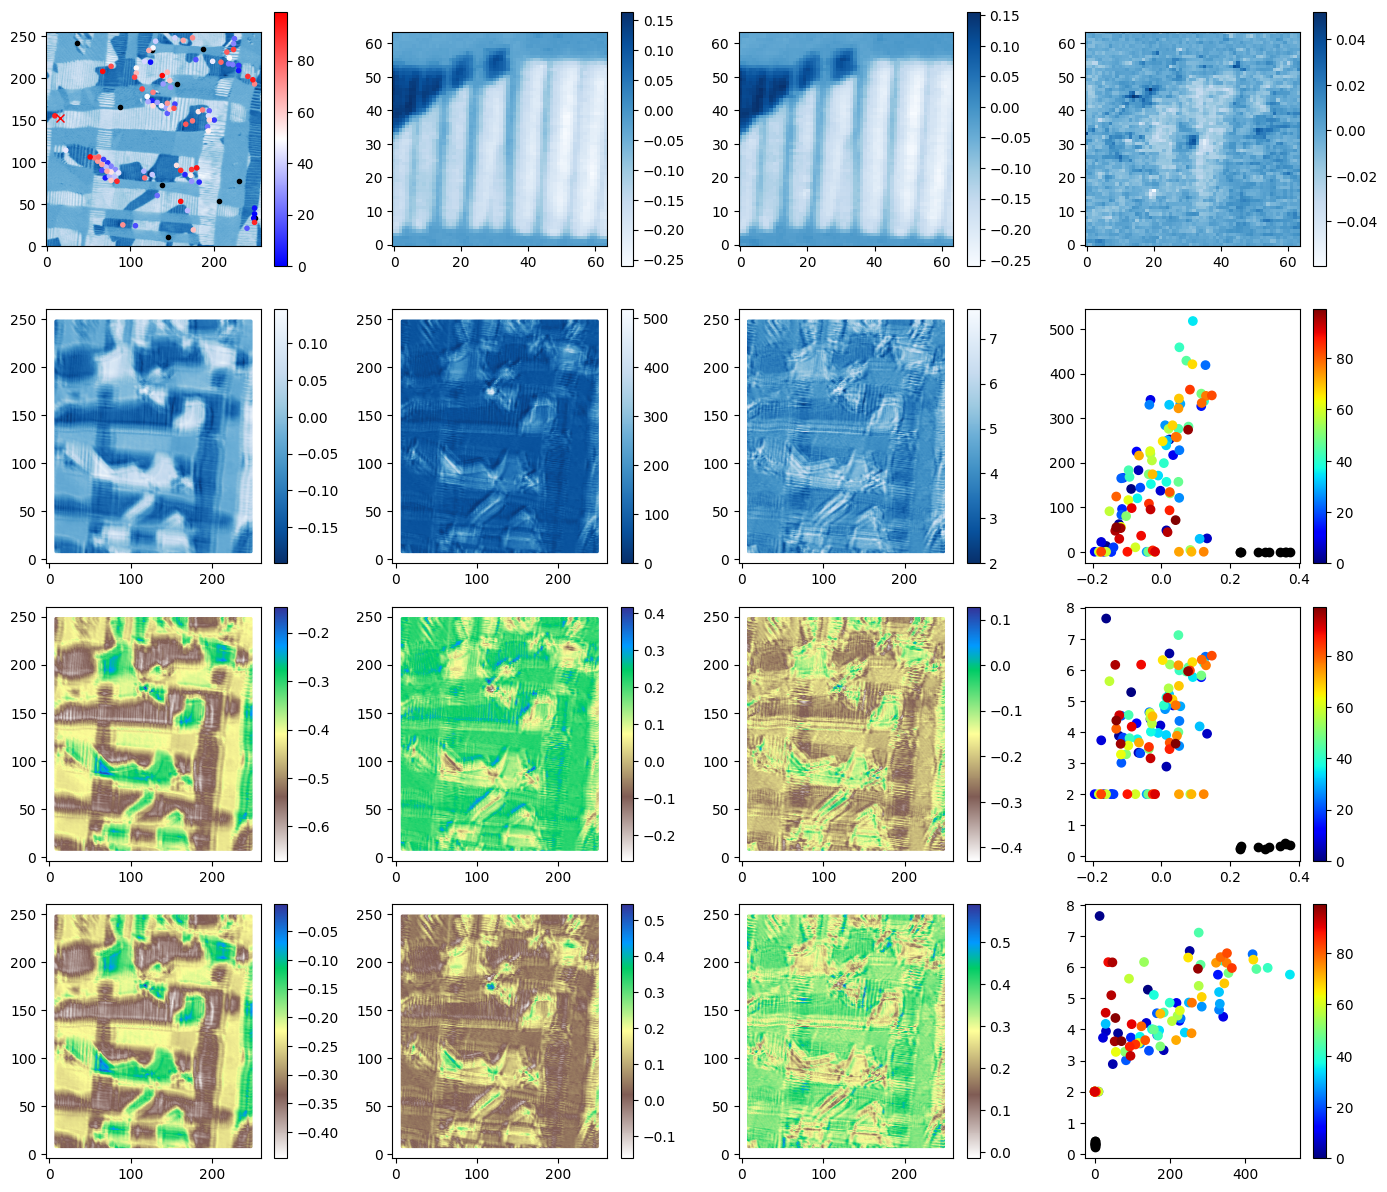

In [21]:
fig = plt.figure(figsize=(14, 12))
plot_pareto_step(exp, 100, fig=fig)

## Individual plots

In [22]:
num_seed = exp.param['num_seed']
step = 200 + num_seed

exp.param['ws'] = 16

# index_nonzero = np.where(rewards[:,1]>0)

# X_train = torch.stack([exp.param['patches_all'][idx] for idx in exp.param['indices_measured'][index_nonzero]]).to(exp.param['device'])
# Y_train = torch.tensor(exp.param['rewards_new'][index_nonzero]).to(exp.param['device'])

X_train = torch.stack([exp.param['patches_all'][idx] for idx in exp.param['indices_measured'][:step]]).to(exp.param['device'])
Y_train = torch.tensor(exp.param['rewards_new'][:step]).to(exp.param['device'])

models = exp.train_model(X_train=X_train, Y_train=Y_train, num_epochs=30)

pred_pos, embeddings_pos = exp.model_predict(models, patches=exp.param['patches_pred_pos'])
pred_neg, embeddings_neg = exp.model_predict(models, patches=exp.param['patches_pred_neg'])

coords = exp.param['coords']
X_coord = np.array(exp.param['indices_all'])
amp_after = exp.param['amp_after']
amp_before = exp.param['amp_before']
traces = exp.param['traces']

seed_indices = np.array(exp.param['indices_measured_seed'])
seed_coords = X_coord[seed_indices]
acquired_coords = X_coord[exp.param['indices_measured']]
rewards = exp.param['rewards_new']

/tmp/ipython-input-1741072801.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y_train[:, i], dtype=dtype).to(device)


In [23]:
# Convert switched domain size from area to radius

rewards[:,1] = np.sqrt(rewards[:, 1]/np.pi)/64*1e3

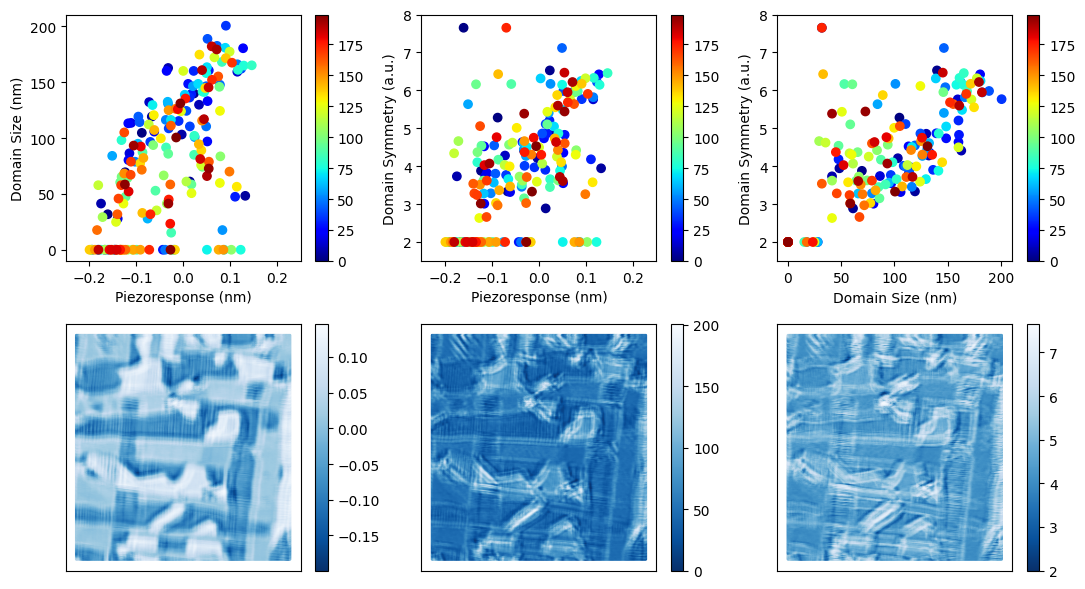

In [24]:
fig, ax = plt.subplots(2,3,figsize=[11, 6])

img = []

indices = [[0, 1], [0,2], [1,2]]

titles = [   'Rew 1: Piezoresponse (nm)', 'Rew 2: Domain Size (nm)', 'Rew 3: Domain Symmetry (a.u.)', 'Rew 2 vs. Rew 1',
             'Rew 3 vs. Rew 1',
              'Rew 3 vs. Rew 2',]

xlabels = ['Piezoresponse (nm)', 'Piezoresponse (nm)', 'Domain Size (nm)']
ylabels = ['Domain Size (nm)', 'Domain Symmetry (a.u.)', 'Domain Symmetry (a.u.)']

for i in range(3):
    ax[0,i].scatter(pred_pos[indices[i][0]].mean.detach().cpu().numpy()[:num_seed],
                    pred_pos[indices[i][1]].mean.detach().cpu().numpy()[:num_seed], c='k')
    img.append(ax[0,i].scatter(rewards[num_seed:step,indices[i][0]], rewards[num_seed:step,indices[i][1]],
                                   c=np.arange(step-num_seed), cmap=plt.cm.jet))

for i in range(3):
    if not i:
        img.append(ax[1,i].scatter(X_coord[:,1], X_coord[:,0],
                                   c=scale_to_match_range(pred_pos[i].mean.detach().cpu().numpy(), rewards[:,i]),
                               cmap=plt.cm.Blues_r, s=1))
    else:
        img.append(ax[1,i].scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred_pos[i].mean.detach().cpu().numpy(), rewards[:,i]),
                                   cmap=plt.cm.Blues_r, s=1))
    # img.append(ax[0,i].scatter(X_coord[:,1], X_coord[:,0],
    #                            c=np.log(scale_to_match_range(pred[i].mean.detach().cpu().numpy(), rewards[:,i])), cmap=plt.cm.Blues))

for i in range(6):
    plt.colorbar(img[i], ax=ax[i//3,i%3])
ax[0,0].set_xlim(-0.25, 0.25)
ax[0,1].set_xlim(-0.25, 0.25)
ax[0,1].set_ylim(1.5, 8)
ax[0,2].set_ylim(1.5, 8)


for i in range(3):
    # ax[1, i%3].set_title(titles[i])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    ax[0,i].set_xlabel(xlabels[i])
    ax[0,i].set_ylabel(ylabels[i])

plt.tight_layout()
# plt.savefig('{}_pareto_overview_epochs_30_pu.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

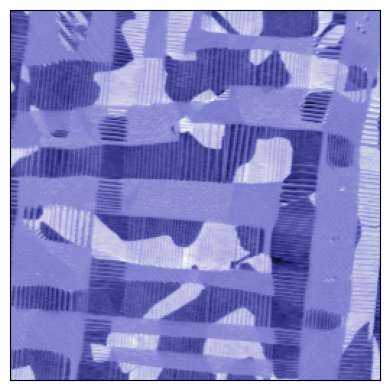

In [ ]:
# import stmpy

tp = exp.param['topo_global'][0]
c = np.mean(tp)
s = np.std(tp)

plt.figure(figsize=[4,4])
plt.imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_frame_on(True)

plt.tight_layout()
# plt.savefig('{}_topo_overview.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.)

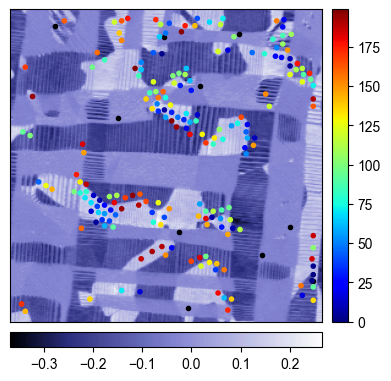

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

tp = exp.param['topo_global'][0]
c = np.mean(tp)
s = np.std(tp)

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
ax.scatter(seed_coords[:, 1], seed_coords[:, 0], c="k", label="Seed Points", marker=".")
time_order = np.arange(len(acquired_coords[num_seed:step, 1]))  # Create a sequence representing time
im = ax.scatter(acquired_coords[num_seed:step, 1], acquired_coords[num_seed:step, 0], c=time_order, cmap="jet",
                           label="Acquired Points", marker=".")

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# cax.yaxis.set_ticks_position('left')
cbar = fig.colorbar(im, cax=cax)

# cbar.set_label("Acquisition Step", rotation=270, labelpad=15)
cax2 = divider.append_axes("bottom", size="5%", pad=0.1)
# cax2.yaxis.set_ticks_position('top')
fig.colorbar(im_base, cax=cax2, orientation='horizontal')

plt.tight_layout()
# plt.savefig('{}_topo_overview_with_traces.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

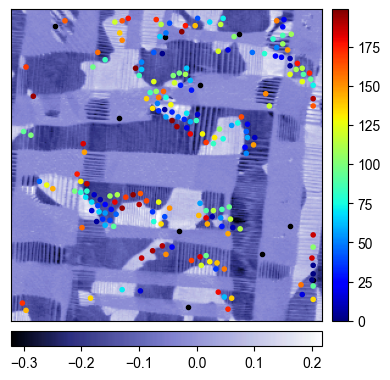

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

tp = exp.param['topo_global'][-1]
c = np.mean(tp)
s = np.std(tp)

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
ax.scatter(seed_coords[:, 1], seed_coords[:, 0], c="k", label="Seed Points", marker=".")
time_order = np.arange(len(acquired_coords[num_seed:step, 1]))  # Create a sequence representing time
im = ax.scatter(acquired_coords[num_seed:step, 1], acquired_coords[num_seed:step, 0], c=time_order, cmap="jet",
                           label="Acquired Points", marker=".")

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# cax.yaxis.set_ticks_position('left')
cbar = fig.colorbar(im, cax=cax)

# cbar.set_label("Acquisition Step", rotation=270, labelpad=15)
cax2 = divider.append_axes("bottom", size="5%", pad=0.1)
# cax2.yaxis.set_ticks_position('top')
fig.colorbar(im_base, cax=cax2, orientation='horizontal')

plt.tight_layout()
plt.savefig('{}_topo_overview_with_traces_final.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

### Embeddings

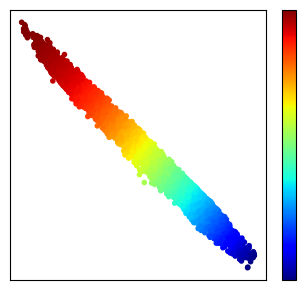

In [ ]:
idx = 50
plt.figure(figsize=[3.5,3])
im = plt.scatter(embeddings_pos[0][:,0], embeddings_pos[0][:,1], marker='.', cmap='jet',
                 c=scale_to_match_range(pred_pos[0].mean.detach().cpu().numpy()[:], rewards[:,0]))
plt.colorbar(im, ax=plt.gca(), ticks=[])
# plt.axis('off')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_frame_on(True)
plt.tight_layout()
plt.savefig('{}_GP_amp_30.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

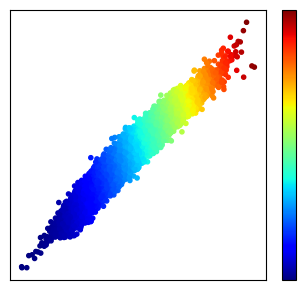

In [ ]:
idx = 50
plt.figure(figsize=[3.5,3])
im = plt.scatter(embeddings_pos[1][:,0], embeddings_pos[1][:,1], marker='.', cmap='jet',
                 c=scale_to_match_range(pred_pos[1].mean.detach().cpu().numpy()[:], rewards[:,1]))
plt.colorbar(im, ax=plt.gca(), ticks=[])
# plt.axis('off')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_frame_on(True)
plt.tight_layout()
plt.savefig('{}_GP_size_30.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

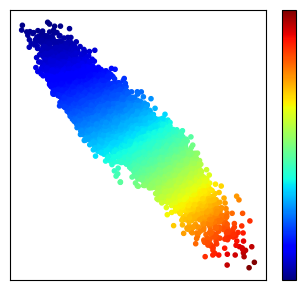

In [ ]:
idx = 50
plt.figure(figsize=[3.5,3])
im = plt.scatter(embeddings_pos[2][:,0], embeddings_pos[2][:,1], marker='.', cmap='jet',
                 c=scale_to_match_range(pred_pos[2].mean.detach().cpu().numpy()[:], rewards[:,2]))
plt.colorbar(im, ax=plt.gca(), ticks=[])
# plt.axis('off')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_frame_on(True)
plt.tight_layout()
plt.savefig('{}_GP_symmetry_30.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

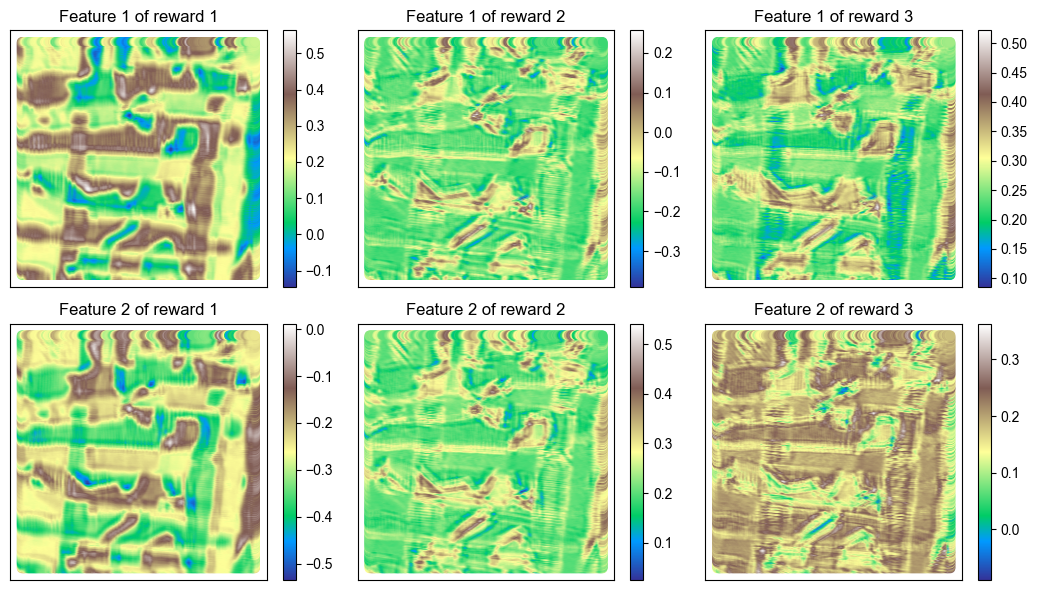

In [ ]:
fig, ax = plt.subplots(2,3,figsize=[10.5, 6])

img = []

indices = [[0, 1], [0,2], [1,2]]

titles = ['Feature 1 of reward 1',  'Feature 1 of reward 2', 'Feature 1 of reward 3',
             'Feature 2 of reward 1', 'Feature 2 of reward 2', 'Feature 2 of reward 3',]

xlabels = ['Piezoresponse (nm)', 'Piezoresponse (nm)', 'Domain Size (pixels)']
ylabels = ['Domain Size (pixels)', 'Domain Symmetry (a.u.)', 'Domain Symmetry (a.u.)']

for i in range(3):
    img.append(ax[0,i].scatter(X_coord[:,1], X_coord[:,0], c=embeddings_pos[i][:, 0], cmap=plt.cm.terrain))
    # img.append(ax[0,i].scatter(X_coord[:,1], X_coord[:,0],
    #                            c=np.log(scale_to_match_range(pred[i].mean.detach().cpu().numpy(), rewards[:,i])), cmap=plt.cm.Blues))

for i in range(3):
    # ax[1,i].scatter(pred[indices[i][0]].mean.detach().cpu().numpy()[:num_seed], pred[indices[i][1]].mean.detach().cpu().numpy()[:num_seed], c='k')
    img.append(ax[1,i].scatter(X_coord[:,1], X_coord[:,0], c=embeddings_pos[i][:, 1], cmap=plt.cm.terrain))

for i in range(6):

    plt.colorbar(img[i], ax=ax[i//3,i%3])
# ax[1,0].set_xlim(0, 0.2)
# ax[1,1].set_xlim(0, 0.2)
# ax[1,1].set_ylim(1.5, 8)

for i in range(6):
    ax[i//3, i%3].set_title(titles[i])
    ax[i//3, i%3].set_xticks([])
    ax[i//3, i%3].set_yticks([])
    # ax[1,i].set_xlabel(xlabels[i])
    # ax[1,i].set_ylabel(ylabels[i])

plt.tight_layout()
plt.savefig('{}_pareto_features_full_30.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

In [ ]:
# folder1 = os.path.join('data', '250522', 'PTKTO_MOBO_DKL_04')

topo_data = ae.tools.load_ibw('PTKTO_test_0002.ibw')
topo = topo_data.data[2] * np.cos(topo_data.data[4]/180*np.pi) * 1e9

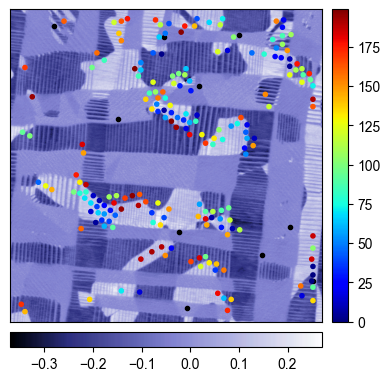

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

tp = topo
c = np.mean(tp)
s = np.std(tp)

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
ax.scatter(seed_coords[:, 1]*2, seed_coords[:, 0]*2, c="k", label="Seed Points", marker=".")
time_order = np.arange(len(acquired_coords[num_seed:step, 1]))  # Create a sequence representing time
im = ax.scatter(acquired_coords[num_seed:step, 1]*2, acquired_coords[num_seed:step, 0]*2, c=time_order, cmap="jet",
                           label="Acquired Points", marker=".")

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# cax.yaxis.set_ticks_position('left')
cbar = fig.colorbar(im, cax=cax)

# cbar.set_label("Acquisition Step", rotation=270, labelpad=15)
cax2 = divider.append_axes("bottom", size="5%", pad=0.1)
# cax2.yaxis.set_ticks_position('top')
fig.colorbar(im_base, cax=cax2, orientation='horizontal')

plt.tight_layout()
# plt.savefig('{}_topo_overview_with_traces_highres.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

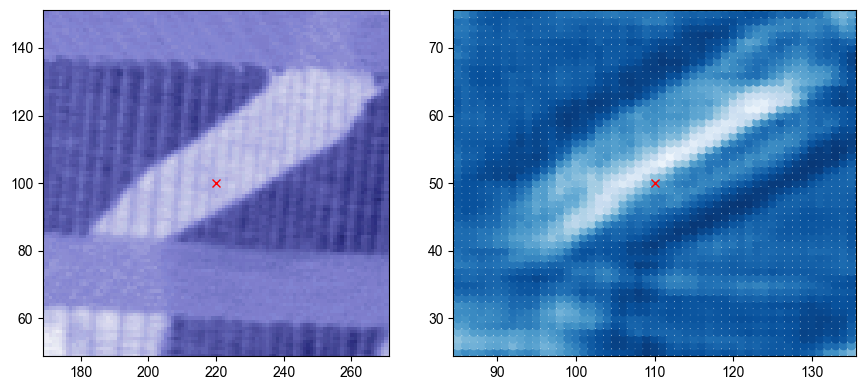

In [ ]:
x0 = 110
y0 = 50
width = 25.6
fig,ax=plt.subplots(1,2,figsize=[9,4])
ax[0].imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
ax[1].scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred_pos[1].mean.detach().cpu().numpy(), rewards[:,1]),
                               cmap=plt.cm.Blues_r)
ax[0].plot(x0*2, y0*2, 'rx')
ax[1].plot(x0*1, y0*1, 'rx')

ax[0].set_xlim(x0*2-width*2, x0*2+width*2)
ax[0].set_ylim(y0*2-width*2, y0*2+width*2)

ax[1].set_xlim(x0*1-width, x0*1+width)
ax[1].set_ylim(y0*1-width, y0*1+width)

plt.tight_layout()

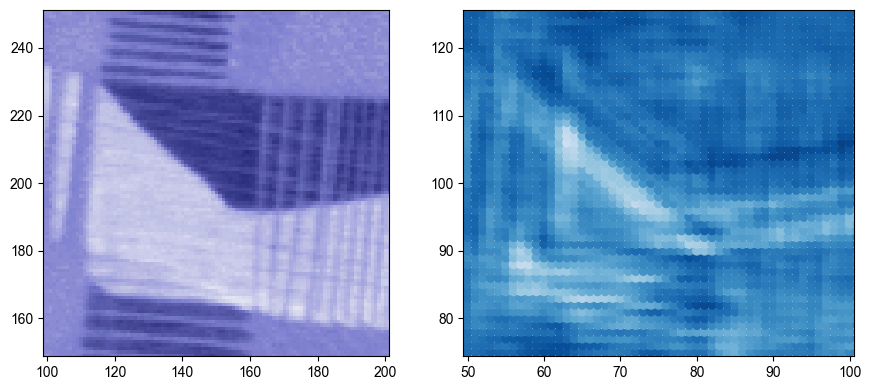

In [ ]:
x0 = 75
y0 = 100
width = 25.6
fig,ax=plt.subplots(1,2,figsize=[9,4])
ax[0].imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
ax[1].scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred_pos[1].mean.detach().cpu().numpy(), rewards[:,1]),
                               cmap=plt.cm.Blues_r)

ax[0].set_xlim(x0*2-width*2, x0*2+width*2)
ax[0].set_ylim(y0*2-width*2, y0*2+width*2)

ax[1].set_xlim(x0*1-width, x0*1+width)
ax[1].set_ylim(y0*1-width, y0*1+width)

plt.tight_layout()

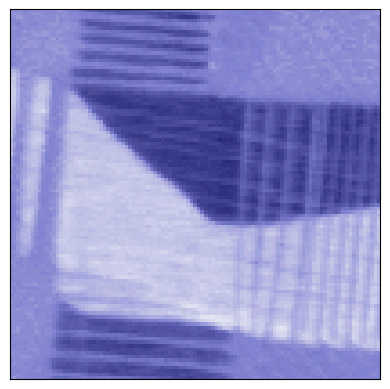

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

x0 = 75
y0 = 100
width = 25.6

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
# ax.scatter(seed_coords[:, 1]*2, seed_coords[:, 0]*2, c="k", label="Seed Points", marker=".")
time_order = np.arange(len(acquired_coords[num_seed:step, 1]))  # Create a sequence representing time
# im = ax.scatter(acquired_coords[num_seed:step, 1]*2, acquired_coords[num_seed:step, 0]*2, c=time_order, cmap="jet",
#                            label="Acquired Points", marker=".")

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(x0*2-width*2, x0*2+width*2)
ax.set_ylim(y0*2-width*2, y0*2+width*2)

ax.set_frame_on(True)

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cax.yaxis.set_ticks_position('left')
# cbar = fig.colorbar(im_base, cax=cax)

# cbar.set_label("Acquisition Step", rotation=270, labelpad=15)
# cax2 = divider.append_axes("bottom", size="5%", pad=0.1)
# # cax2.yaxis.set_ticks_position('top')
# fig.colorbar(im_base, cax=cax2, orientation='horizontal')

plt.tight_layout()
# plt.savefig('{}_topo_zoomed_no_cbar2.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.)

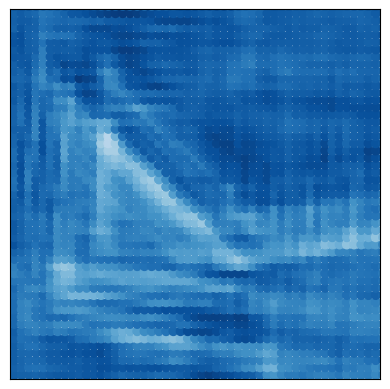

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

x0 = 75
y0 = 100
width = 25.6

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred_pos[1].mean.detach().cpu().numpy(), rewards[:,1]),
                               cmap=plt.cm.Blues_r)

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(x0*1-width*1, x0*1+width*1)
ax.set_ylim(y0*1-width*1, y0*1+width*1)

ax.set_aspect(1)
ax.set_frame_on(True)

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cax.yaxis.set_ticks_position('left')
# cbar = fig.colorbar(im_base, cax=cax)

plt.tight_layout()
# plt.savefig('{}_pred_zoomed_no_cbar_30_1.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.)

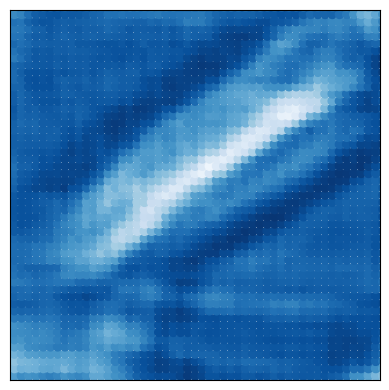

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

x0 = 110
y0 = 50
width = 25.6

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred_pos[1].mean.detach().cpu().numpy(), rewards[:,1]),
                               cmap=plt.cm.Blues_r)

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(x0*1-width*1, x0*1+width*1)
ax.set_ylim(y0*1-width*1, y0*1+width*1)

ax.set_aspect(1)
ax.set_frame_on(True)

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cax.yaxis.set_ticks_position('left')
# cbar = fig.colorbar(im_base, cax=cax)

plt.tight_layout()
# plt.savefig('{}_pred_zoomed_no_cbar_30_2.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.)

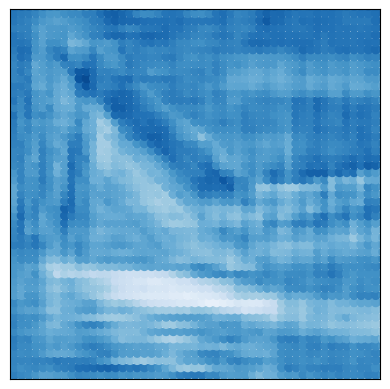

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

x0 = 75
y0 = 100
width = 25.6

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred_pos[2].mean.detach().cpu().numpy(), rewards[:,2]),
                               cmap=plt.cm.Blues_r)

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(x0*1-width*1, x0*1+width*1)
ax.set_ylim(y0*1-width*1, y0*1+width*1)

ax.set_aspect(1)
ax.set_frame_on(True)

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cax.yaxis.set_ticks_position('left')
# cbar = fig.colorbar(im_base, cax=cax)

plt.tight_layout()
# plt.savefig('{}_pred_zoomed_symmetry_30_2.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.)

## Distance physics descriptor

In [ ]:
norm_ = lambda x: (x-np.min(x)) / np.ptp(x)

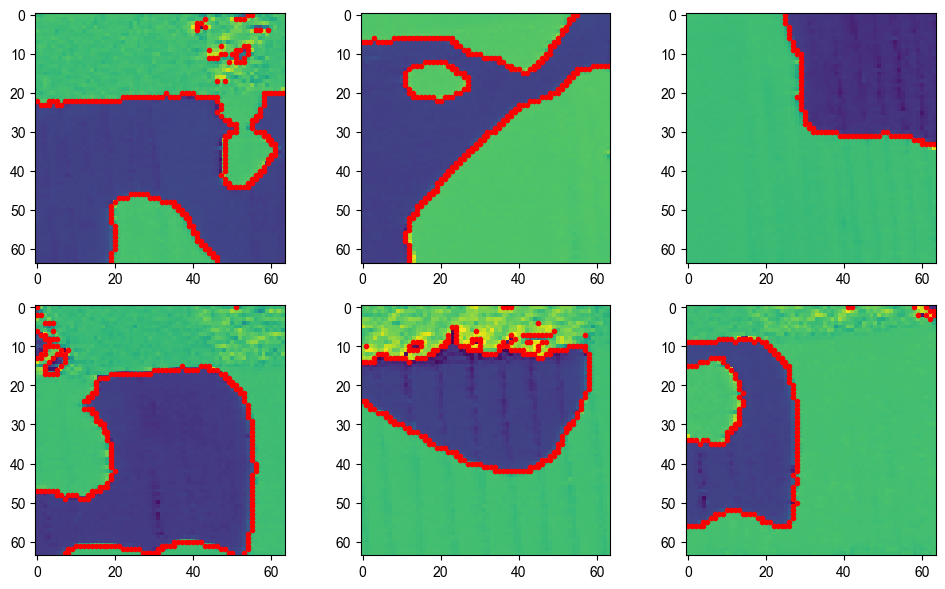

In [ ]:
# Let's visualize the image patches after cropping

index_nonzero = np.where(rewards[:,1]>0)

img_index = np.random.randint(0, len(rewards[index_nonzero]), size=6)

fig,ax=plt.subplots(2,3,figsize=[10,6])
for i in range(6):
    tp = exp.param['phase_before'][index_nonzero][img_index[i]] #* amp_before[img_index[i]]
    # edges = cv2.Canny((norm_(tp) * 255).astype(np.uint8), threshold1=50, threshold2=100)
    image = (norm_(tp) * 256)
    image = image.astype(np.uint8)
    # Step 2: Get edge pixel coordinates
    edge_coords = np.where(cv2.Canny(image, 255, 255)>0)

    ax[i//3,i%3].imshow(tp)
    ax[i//3,i%3].plot(edge_coords[1], edge_coords[0], 'r.')

plt.tight_layout()

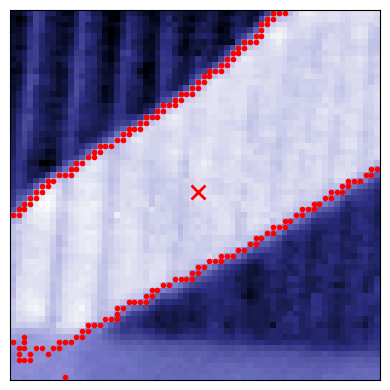

In [ ]:
idx = 197

tp = exp.param['phase_before'][idx] #* amp_before[img_index[i]]
# edges = cv2.Canny((norm_(tp) * 255).astype(np.uint8), threshold1=50, threshold2=100)
image = (norm_(tp) * 256)
image = image.astype(np.uint8)
# Step 2: Get edge pixel coordinates
edge_coords = np.where(cv2.Canny(image, 255, 255)>0)

plt.figure(figsize=[4,4])
plt.imshow(amp_before[idx], origin='lower',cmap=plt.cm.Blues)
plt.plot(edge_coords[1], edge_coords[0], 'r.')
plt.plot(32, 32, 'rx', ms=10, mew=2)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()
# plt.savefig('{}_distance_scheme.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Example: Assuming `img` is a 2D grayscale numpy array
def closest_edge_distance(img):
    # Step 1: Apply Canny edge detection
    edges = cv2.Canny((norm_(img) * 256).astype(np.uint8), threshold1=255, threshold2=255)

    # Step 2: Get edge pixel coordinates
    edge_coords = np.argwhere(edges > 0)

    # Step 3: Get center coordinate
    center = np.array([[img.shape[0] // 2, img.shape[1] // 2]])

    # Step 4: Compute distances from center to all edge pixels
    distances = cdist(center, edge_coords)

    # Step 5: Return minimum distance
    if img[img.shape[0] // 2, img.shape[1] // 2] < 0:
        return distances.min()
    else:
        return -distances.min()

In [ ]:
index_nonzero = np.where(rewards[:,1]>0)
distances_nonzero = np.zeros(len(index_nonzero[0]))

for i in range(len(index_nonzero[0])):
    distances_nonzero[i] = closest_edge_distance(exp.param['phase_before'][index_nonzero][i])

index_zero = np.where(rewards[:,1]==0)
distances_zero = np.zeros(len(index_zero[0]))

for i in range(len(index_zero[0])):
    distances_zero[i] = closest_edge_distance(exp.param['phase_before'][index_zero][i])

In [ ]:
distances = np.zeros(len(rewards))

for i in range(len(rewards)):
    distances[i] = closest_edge_distance(exp.param['phase_before'][i])

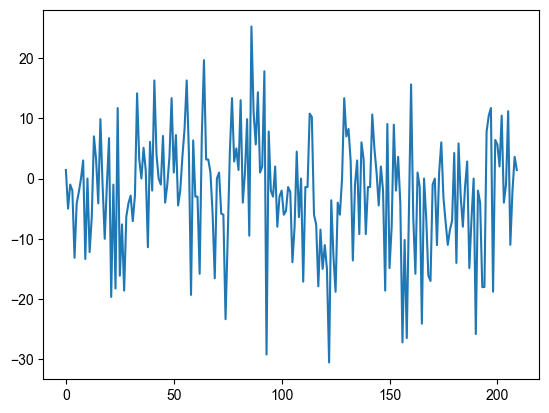

In [ ]:
plt.plot(distances)

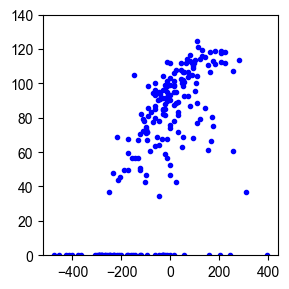

In [ ]:
# plt.scatter(rewards[index_nonzero, 1], distances)
plt.figure(figsize=[3,3])
plt.scatter(distances/64*1e3, np.sqrt(rewards[:, 1]/np.pi)/64*1e3, marker='.', c='blue')
plt.ylim(0, 140)
plt.tight_layout()
# plt.savefig('{}_all_distances.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

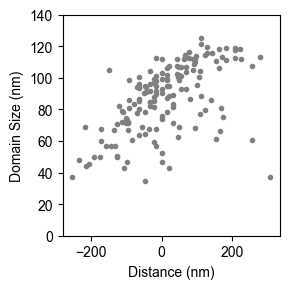

In [ ]:
# plt.scatter(rewards[index_nonzero, 1], distances)
plt.figure(figsize=[3,3])
plt.scatter(distances_nonzero/64*1e3, np.sqrt(rewards[index_nonzero, 1]/np.pi)/64*1e3, marker='.', c='gray')
plt.ylim(0, 140)
plt.xlabel('Distance (nm)')
plt.ylabel('Domain Size (nm)')
plt.tight_layout()
# plt.savefig('{}_nonzero_distances.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

(array([ 2.,  4.,  2.,  8., 12., 10.,  6.,  7.,  3.,  1.]),
 array([-35.77708764, -29.59937888, -23.42167011, -17.24396135,
        -11.06625258,  -4.88854382,   1.28916494,   7.46687371,
         13.64458247,  19.82229124,  26.        ]),
 <BarContainer object of 10 artists>)

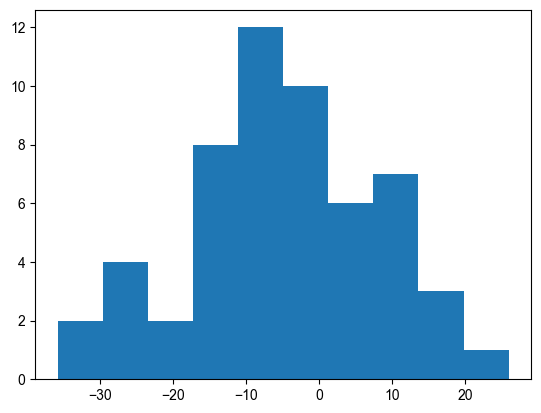

In [ ]:
plt.hist(distances_zero)

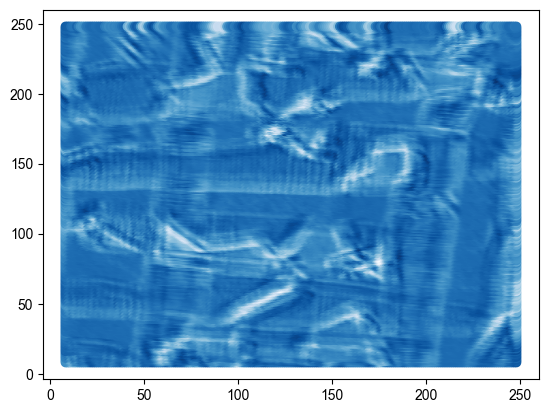

In [ ]:
plt.scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred_pos[1].mean.detach().cpu().numpy(), rewards[:,1]),
                                   cmap=plt.cm.Blues_r)

In [ ]:
from scipy.interpolate import RegularGridInterpolator

def linecut(data, p0, p1, width=1, dl=1, dw=1, kind='linear',
                show=False, ax=None, **kwarg):
    '''Linecut tool for 2D or 3D data.

    Inputs:
        data    - Required : A 2D or 3D numpy array.
        p0      - Required : A tuple containing indicies for the start of the
                             linecut: p0=(x0,y0)
        p1      - Required : A tuple containing indicies for the end of the
                             linecut: p1=(x1,y1)
        width   - Optional : Float for perpendicular width to average over.
        dl      - Optional : Extra pixels for interpolation in the linecut
                             direction.
        dw      - Optional : Extra pixels for interpolation in the
                             perpendicular direction.
        kind    - Optional : Sting for interpolation scheme. Options are:
                             'nearest', 'linear', 'cubic', 'quintic'.  Note
                             that 'linear', 'cubic', 'quintic' use spline.
        show    - Optional : Boolean determining whether to plot where the
                             linecut was taken.
        ax      - Optional : Matplotlib axes instance to plot where linecut is
                             taken.  Note, if show=True you MUST provide and
                             axes instance as plotting is done using ax.plot().
        **kwarg - Optional : Additional keyword arguments passed to ax.plot().

    Returns:
        r   -   1D numpy array which goes from 0 to the length of the cut.
        cut -   1D or 2D numpy array containg the linecut.

    Usage:
        r, cut = linecut(data, (x0,y0), (x1,y1), width=1, dl=0, dw=0,
                         show=False, ax=None, **kwarg)
    '''
    def calc_length(p0, p1, dl):
        dx = float(p1[0]-p0[0])
        dy = float(p1[1]-p0[1])
        l = np.sqrt(dy**2 + dx**2)
        if dx == 0:
            theta = np.pi/2
        else:
            theta = np.arctan(dy / dx)
        xtot = np.linspace(p0[0], p1[0], int(np.ceil(l+dl)))
        ytot = np.linspace(p0[1], p1[1], int(np.ceil(l+dl)))
        return l, theta, xtot, ytot

    def get_perp_line(x, y, theta, w):
        wx0 = x - w/2.0*np.cos(np.pi/2 - theta)
        wx1 = x + w/2.0*np.cos(np.pi/2 - theta)
        wy0 = y + w/2.0*np.sin(np.pi/2 - theta)
        wy1 = y - w/2.0*np.sin(np.pi/2 - theta)
        return (wx0, wx1), (wy0, wy1)

    def cutter(F, p0, p1, dw):
        l, __, xtot, ytot = calc_length(p0, p1, dw)
        cut = np.zeros(int(np.ceil(l+dw)))
        for ix, (x,y) in enumerate(zip(xtot, ytot)):
            cut[ix] = F(x,y)
        return cut

    # def linecut2D(layer, p0, p1, width, dl, dw):
    #     xAll, yAll = np.arange(layer.shape[1]), np.arange(layer.shape[0])
    #     F = interp2d(xAll, yAll, layer, kind=kind)
    #     l, theta, xtot, ytot = calc_length(p0, p1, dl)
    #     r = np.linspace(0, l, int(np.ceil(l+dl)))
    #     cut = np.zeros(int(np.ceil(l+dl)))
    #     for ix, (x,y) in enumerate(zip(xtot,ytot)):
    #         (wx0, wx1), (wy0, wy1) = get_perp_line(x, y, theta, width)
    #         wcut = cutter(F, (wx0,wy0), (wx1,wy1), dw)
    #         cut[ix] = np.mean(wcut)
    #     return r, cut
    def linecut2D(layer, p0, p1, width, dl, dw):
        yAll = np.arange(layer.shape[0])  # rows
        xAll = np.arange(layer.shape[1])  # cols

        # Step 1: Create interpolator
        F = RegularGridInterpolator((yAll, xAll), layer, bounds_error=False, fill_value=np.nan)

        # Step 2: Get main line points
        l, theta, xtot, ytot = calc_length(p0, p1, dl)
        r = np.linspace(0, l, int(np.ceil(l + dl)))
        cut = np.zeros_like(r)

        # Step 3: Loop over each main-line point and get perpendicular linecut
        for ix, (x, y) in enumerate(zip(xtot, ytot)):
            (wx0, wx1), (wy0, wy1) = get_perp_line(x, y, theta, width)

            # get dw samples along the perpendicular line
            t = np.linspace(0, 1, int(np.ceil(dw)))
            xs = wx0 + t * (wx1 - wx0)
            ys = wy0 + t * (wy1 - wy0)

            # Stack into N x 2 coordinates
            points = np.stack([ys, xs], axis=-1)

            # Interpolate values
            wcut = F(points)
            cut[ix] = np.nanmean(wcut)

        return r, cut

    if len(data.shape) == 2:
        r, cut = linecut2D(data, p0, p1, width, dl, dw)
    if len(data.shape) == 3:
        l, __, __, __ = calc_length(p0, p1, dl)
        cut = np.zeros([data.shape[0], int(np.ceil(l+dl))])
        for ix, layer in enumerate(data):
            r, cut[ix] = linecut2D(layer, p0, p1, width, dl, dw)
    if show:
        __, theta, __, __ = calc_length(p0, p1, dl)
        (wx00, wx01), (wy00, wy01) = get_perp_line(p0[0], p0[1], theta, width)
        (wx10, wx11), (wy10, wy11) = get_perp_line(p1[0], p1[1], theta, width)
        ax.plot([p0[0],p1[0]], [p0[1],p1[1]], 'k--', **kwarg)
        ax.plot([wx00,wx01], [wy00,wy01], 'k:', **kwarg)
        ax.plot([wx10,wx11], [wy10,wy11], 'k:', **kwarg)
    return r, cut

C:\Users\yu93l\AppData\Local\Temp\ipykernel_27592\1191609376.py:114: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p0[0],p1[0]], [p0[1],p1[1]], 'k--', **kwarg)
C:\Users\yu93l\AppData\Local\Temp\ipykernel_27592\1191609376.py:115: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax.plot([wx00,wx01], [wy00,wy01], 'k:', **kwarg)
C:\Users\yu93l\AppData\Local\Temp\ipykernel_27592\1191609376.py:116: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax.plot([wx10,wx11], [wy10,wy11], 'k:', **kwarg)


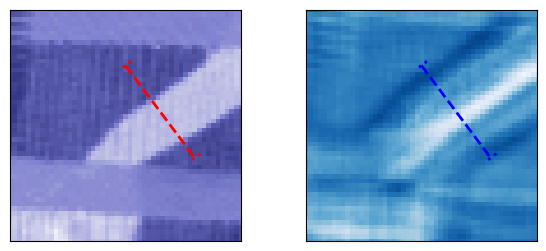

In [ ]:
import stmpy

tp = exp.param['topo_global'][0]
c = np.mean(tp)
s = np.std(tp)

fig, ax =plt.subplots(1,2,figsize=[7,3])
ax[0].imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
ax[0].set_xlim(75, 125)
ax[0].set_ylim(25, 75)

ax[1].imshow(img, origin='lower',  cmap=plt.cm.Blues_r)
ax[1].set_xlim(75, 125)
ax[1].set_ylim(25, 75)

ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

r1, cut1 = linecut(tp, [100, 63], [115, 43], width=3, show=True, ax=ax[0], color='r', lw=2)
r2, cut2 = linecut(img, [100, 63], [115, 43], width=3, show=True, ax=ax[1], color='b', lw=2)


# plt.tight_layout()
# plt.savefig('{}_linecut_overview.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.)

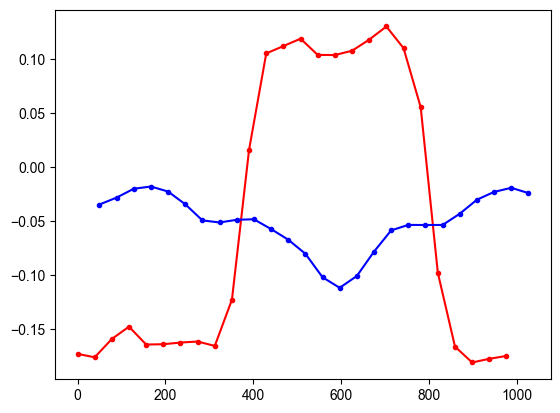

In [ ]:
plt.plot(r1 * 10/256 * 1e3, cut1, 'r.')
plt.plot(r1 * 10/256 * 1e3, cut1, 'r')
plt.plot(r2 * 10/256 * 1e3 + 0.05*1e3, cut2 * np.mean(cut1)/np.mean(cut2), 'b.')
plt.plot(r2 * 10/256 * 1e3 + 0.05*1e3, cut2 * np.mean(cut1)/np.mean(cut2), 'b')


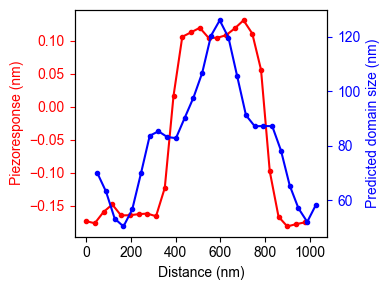

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=[4,3])

# Primary y-axis: red
ax1.plot(r1 * 10/256*1e3, cut1, 'r.')
ax1.plot(r1 * 10/256*1e3, cut1, 'r')
ax1.set_ylabel('Piezoresponse (nm)', color='r')
ax1.tick_params(axis='y', colors='r')

# Secondary y-axis: blue
ax2 = ax1.twinx()
# cut2_scaled = cut2 * np.mean(cut1) / np.mean(cut2)
ax2.plot((r2 * 10/256 + 0.05)*1e3, np.sqrt(cut2/np.pi)/64*1e3, 'b.')
ax2.plot((r2 * 10/256 + 0.05)*1e3, np.sqrt(cut2/np.pi)/64*1e3, 'b')
ax2.set_ylabel('Predicted domain size (nm)', color='b')
ax2.tick_params(axis='y', colors='b')

# Optional: label x-axis
ax1.set_xlabel('Distance (nm)')

plt.tight_layout()

# plt.savefig('{}_compare_distances_new.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)


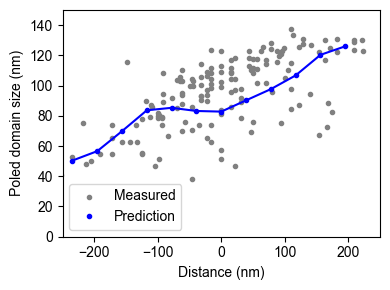

In [ ]:
d1 = (r1 - 9.) * 10/256 * 1e3

plt.figure(figsize=[4,3])
plt.scatter(distances_nonzero/64*1e3, np.sqrt(rewards[index_nonzero, 1]/np.pi)/64*1e3*1.1 , marker='.', c='gray', label='Measured')
plt.ylim(20, 140)

plt.plot(d1[3:15], np.sqrt(cut2[3:15]/np.pi)/64*1e3, 'b')
plt.plot(d1[3:15], np.sqrt(cut2[3:15]/np.pi)/64*1e3, 'b.', label='Prediction')
plt.legend()
plt.ylim(0, 150)
plt.xlim(-250, 250)
plt.xlabel('Distance (nm)')
plt.ylabel('Poled domain size (nm)')
plt.tight_layout()
# plt.savefig('{}_size_vs_distances_new.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)


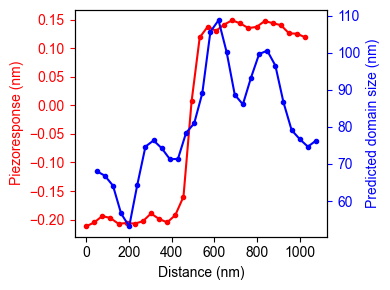

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=[4,3])

# Primary y-axis: red
ax1.plot(r1 * 10/256*1e3, cut1, 'r.')
ax1.plot(r1 * 10/256*1e3, cut1, 'r')
ax1.set_ylabel('Piezoresponse (nm)', color='r')
ax1.tick_params(axis='y', colors='r')

# Secondary y-axis: blue
ax2 = ax1.twinx()
# cut2_scaled = cut2 * np.mean(cut1) / np.mean(cut2)
ax2.plot((r2 * 10/256 + 0.05)*1e3, np.sqrt(cut2/np.pi)/64*1e3, 'b.')
ax2.plot((r2 * 10/256 + 0.05)*1e3, np.sqrt(cut2/np.pi)/64*1e3, 'b')
ax2.set_ylabel('Predicted domain size (nm)', color='b')
ax2.tick_params(axis='y', colors='b')

# Optional: label x-axis
ax1.set_xlabel('Distance (nm)')

plt.tight_layout()
plt.show()

# plt.savefig('{}_compare_distances.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)


# 2505214_PZTO_MOBO_DKL_DW1

## Visualization

In [ ]:
exp = exp_init()

# save_name = os.path.join('output', '20250514_PZTO_DW1')

with open('20250514_PZTO_DW1.pickle', 'rb') as fopen:
    exp.param = pickle.load(fopen)

## Individual plots

In [ ]:
file = 'PZTO_test_0008.ibw'
# folder1 = os.path.join('data', '250514', 'PZTO_MOBO_DKL_DW1')
tp1 = ae.tools.load_ibw(file)

features, indices_all = load_image_and_features(tp1.data[2] * np.cos(tp1.data[4] / 180 * np.pi) * 1e9, exp.param['ws'])
patches = numpy_to_torch_for_conv(features)

exp.update_param('patches_pred', patches)

In [ ]:
# Correct some outliers
exp.param['rewards_new'][21, 1] = 100
exp.param['rewards_new'][3, 1] = 100
exp.param['rewards_new'][85, 2] = 6


In [ ]:
num_seed = exp.param['num_seed']
step = 100 + num_seed

exp.param['ws'] = 8

X_train = torch.stack([exp.param['patches_all'][idx] for idx in exp.param['indices_measured'][:step]]).to(exp.param['device'])
Y_train = torch.tensor(exp.param['rewards_new'][:step]).to(exp.param['device'])
models = exp.train_model(X_train=X_train, Y_train=Y_train, num_epochs=50)
pred, embeddings = exp.model_predict(models, patches=exp.param['patches_pred'])

coords = exp.param['coords']
X_coord = np.array(exp.param['indices_all'])
amp_after = exp.param['amp_after']
amp_before = exp.param['amp_before']
traces = exp.param['traces']

seed_indices = np.array(exp.param['indices_measured_seed'])
seed_coords = X_coord[seed_indices]
acquired_coords = X_coord[exp.param['indices_measured']]
rewards = exp.param['rewards_new']

C:\Users\yu93l\AppData\Local\Temp\ipykernel_27592\1741072801.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y_train[:, i], dtype=dtype).to(device)


In [ ]:
rewards[:,1] = np.sqrt(rewards[:, 1]/np.pi)/64*1e3

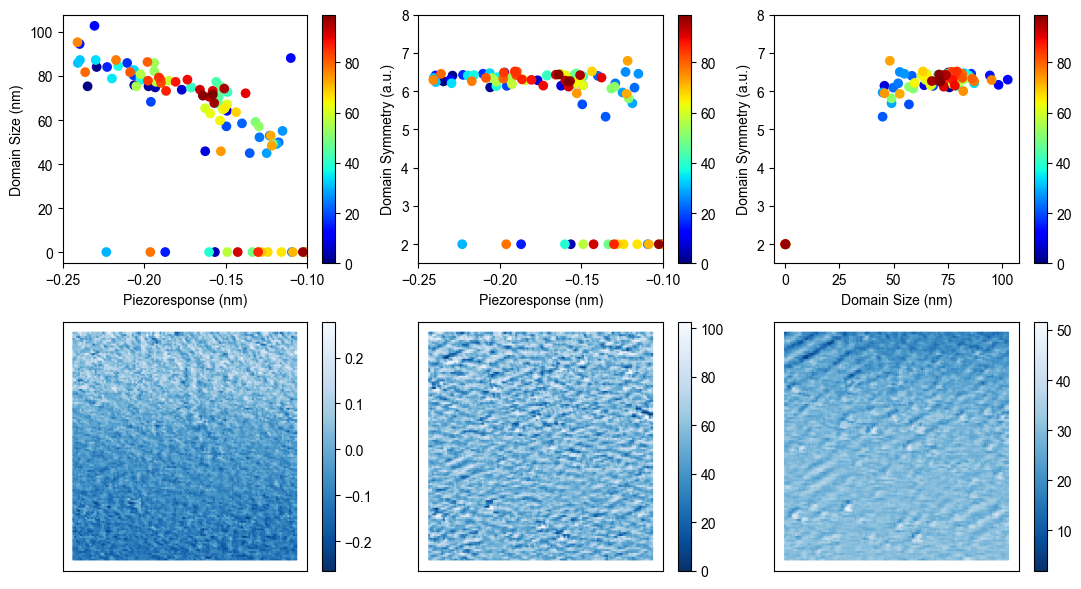

In [ ]:
fig, ax = plt.subplots(2,3,figsize=[11, 6])

img = []

indices = [[0, 1], [0,2], [1,2]]

titles = [   'Rew 1: Piezoresponse (nm)', 'Rew 2: Domain Size (pixels)', 'Rew 3: Domain Symmetry (a.u.)', 'Rew 2 vs. Rew 1',
             'Rew 3 vs. Rew 1',
              'Rew 3 vs. Rew 2',]

xlabels = ['Piezoresponse (nm)', 'Piezoresponse (nm)', 'Domain Size (nm)']
ylabels = ['Domain Size (nm)', 'Domain Symmetry (a.u.)', 'Domain Symmetry (a.u.)']

for i in range(3):
    ax[0,i].scatter(pred[indices[i][0]].mean.detach().cpu().numpy()[:num_seed], pred[indices[i][1]].mean.detach().cpu().numpy()[:num_seed], c='k')
    img.append(ax[0,i].scatter( rewards[num_seed:step,indices[i][0]], rewards[num_seed:step,indices[i][1]],
                               c=np.arange(step-num_seed), cmap=plt.cm.jet))

for i in range(3):
    img.append(ax[1,i].scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred[i].mean.detach().cpu().numpy(), rewards[:,i]),
                               cmap=plt.cm.Blues_r, s=1))
    # img.append(ax[0,i].scatter(X_coord[:,1], X_coord[:,0],
    #                            c=np.log(scale_to_match_range(pred[i].mean.detach().cpu().numpy(), rewards[:,i])), cmap=plt.cm.Blues))


for i in range(6):
    plt.colorbar(img[i], ax=ax[i//3,i%3])
ax[0,0].set_xlim(-0.25, -0.1)
ax[0,1].set_xlim(-0.25, -0.1)
ax[0,1].set_ylim(1.5, 8)
ax[0,2].set_ylim(1.5, 8)
# ax[0,2].set_xlim(0, 200)
# ax[0,0].set_ylim(0, 200)

for i in range(3):
    # ax[1, i%3].set_title(titles[i])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    ax[0,i].set_xlabel(xlabels[i])
    ax[0,i].set_ylabel(ylabels[i])

plt.tight_layout()
# plt.savefig('{}_pareto_overview_pu.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

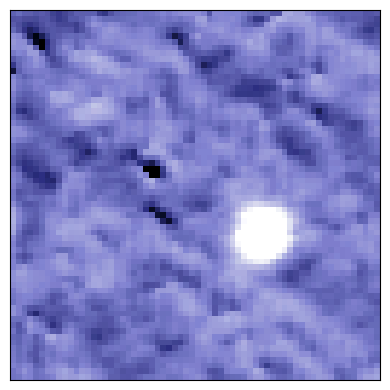

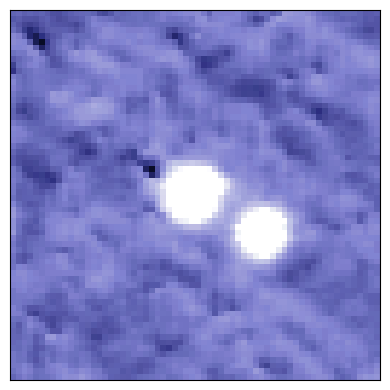

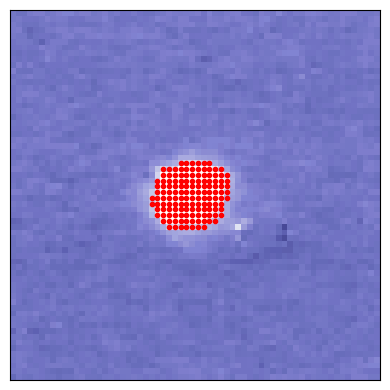

In [ ]:
idx = 23

tp = exp.param['amp_before'][idx]
c = np.mean(tp)
s = np.std(tp)

plt.figure(figsize=[4,4])
plt.imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
# plt.colorbar()
# plt.axis('off')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_frame_on(True)

plt.tight_layout()
# plt.savefig('{}\\topo_before_at_{}.png'.format(save_name, idx), dpi=400, bbox_inches='tight', pad_inches=0.)

tp2 = exp.param['amp_after'][idx]
c = np.mean(tp2)
s = np.std(tp2)
plt.figure(figsize=[4,4])
plt.imshow(tp2, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
# plt.colorbar()
# plt.axis('off')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_frame_on(True)
plt.tight_layout()

# plt.savefig('{}\\topo_after_at_{}.png'.format(save_name, idx), dpi=400, bbox_inches='tight', pad_inches=0.)

tp3 = tp2 - tp
c = np.mean(tp3)
s = np.std(tp3)
plt.figure(figsize=[4,4])
plt.imshow(tp3, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
plt.plot(traces[idx][0], traces[idx][1], 'r.')
# plt.colorbar()
# plt.axis('off')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_frame_on(True)
plt.tight_layout()

# plt.savefig('{}\\topo_change_at_{}.png'.format(save_name, idx), dpi=400, bbox_inches='tight', pad_inches=0.)

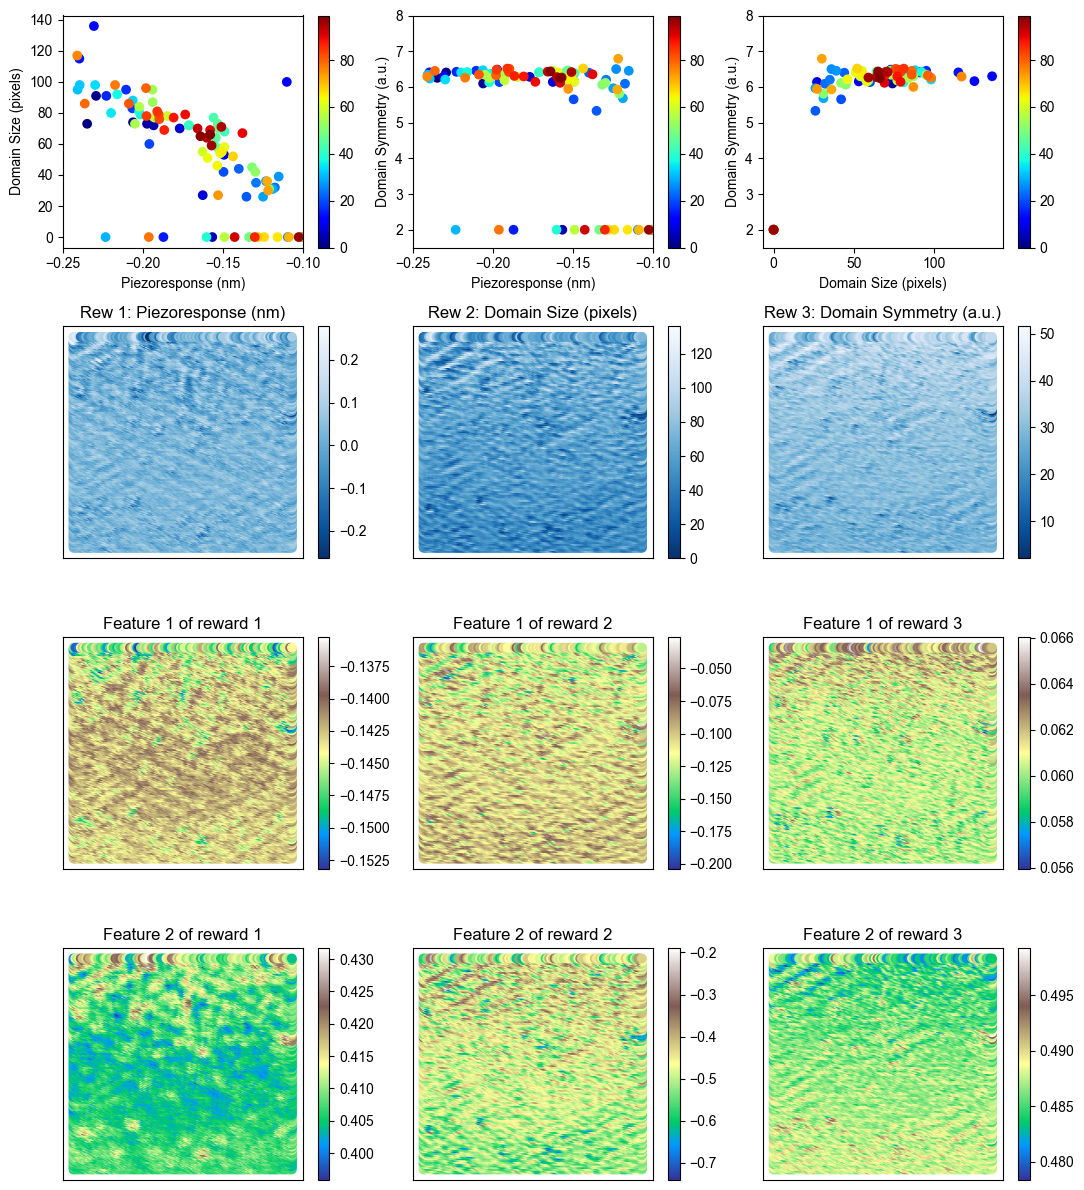

In [ ]:
fig, ax = plt.subplots(4,3,figsize=[11, 12])

img = []

indices = [[0, 1], [0,2], [1,2]]

titles = [   'Rew 1: Piezoresponse (nm)', 'Rew 2: Domain Size (pixels)', 'Rew 3: Domain Symmetry (a.u.)',
          'Feature 1 of reward 1',  'Feature 1 of reward 2', 'Feature 1 of reward 3',
             'Feature 2 of reward 1', 'Feature 2 of reward 2', 'Feature 2 of reward 3',]

xlabels = ['Piezoresponse (nm)', 'Piezoresponse (nm)', 'Domain Size (pixels)']
ylabels = ['Domain Size (pixels)', 'Domain Symmetry (a.u.)', 'Domain Symmetry (a.u.)']

for i in range(3):
    ax[0,i].scatter(pred[indices[i][0]].mean.detach().cpu().numpy()[:num_seed], pred[indices[i][1]].mean.detach().cpu().numpy()[:num_seed], c='k')
    img.append(ax[0,i].scatter(rewards[num_seed:step,indices[i][0]], rewards[num_seed:step,indices[i][1]],
                               c=np.arange(step-num_seed), cmap=plt.cm.jet))

for i in range(3):
    img.append(ax[1,i].scatter(X_coord[:,1], X_coord[:,0], c=scale_to_match_range(pred[i].mean.detach().cpu().numpy(), rewards[:,i]),
                               cmap=plt.cm.Blues_r))
    # img.append(ax[0,i].scatter(X_coord[:,1], X_coord[:,0],
    #                            c=np.log(scale_to_match_range(pred[i].mean.detach().cpu().numpy(), rewards[:,i])), cmap=plt.cm.Blues))

for i in range(3):
    img.append(ax[2,i].scatter(X_coord[:,1], X_coord[:,0], c=embeddings[i][:, 0], cmap=plt.cm.terrain))
    # img.append(ax[0,i].scatter(X_coord[:,1], X_coord[:,0],
    #                            c=np.log(scale_to_match_range(pred[i].mean.detach().cpu().numpy(), rewards[:,i])), cmap=plt.cm.Blues))

for i in range(3):
    # ax[1,i].scatter(pred[indices[i][0]].mean.detach().cpu().numpy()[:num_seed], pred[indices[i][1]].mean.detach().cpu().numpy()[:num_seed], c='k')
    img.append(ax[3,i].scatter(X_coord[:,1], X_coord[:,0], c=embeddings[i][:, 1], cmap=plt.cm.terrain))

for i in range(12):

    plt.colorbar(img[i], ax=ax[i//3,i%3])
ax[0,0].set_xlim(-0.25, -0.1)
ax[0,1].set_xlim(-0.25, -0.1)
ax[0,1].set_ylim(1.5, 8)
ax[0,2].set_ylim(1.5, 8)

for i in range(3, 12):
    ax[i//3, i%3].set_title(titles[i-3])

for i in range(3):
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[3,i].set_xticks([])
    ax[3,i].set_yticks([])
    ax[0,i].set_xlabel(xlabels[i])
    ax[0,i].set_ylabel(ylabels[i])
    # ax[2,i].set_xlabel(xlabels[i])
    # ax[2,i].set_ylabel(ylabels[i])

plt.tight_layout()
# plt.savefig('{}_pareto_overview_full_new.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

In [ ]:
file = 'PZTO_test_0008.ibw'
folder1 = os.path.join('data', '250514', 'PZTO_MOBO_DKL_DW1')

topo_data = ae.tools.load_ibw(os.path.join(folder1, file))
topo = topo_data.data[2] * np.cos(topo_data.data[4]/180*np.pi) * 1e9

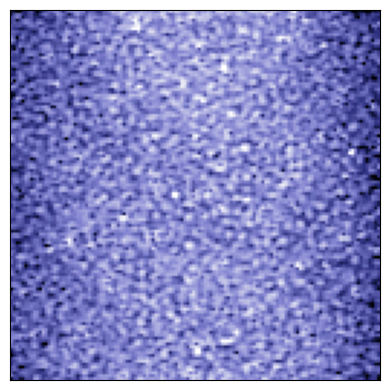

In [ ]:
file = 'PTKTO_global_0009.ibw'
folder1 = os.path.join('data', '250514', 'PZTO_MOBO_DKL_DW1')

topo_data = ae.tools.load_ibw(os.path.join(folder1, file))
# topo = topo_data.data[2] * np.cos(topo_data.data[4]/180*np.pi) * 1e9

height = topo_data.data[0] * 1e9

from mpl_toolkits.axes_grid1 import make_axes_locatable

tp = height
c = np.mean(tp)
s = np.std(tp)

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
# ax.scatter(seed_coords[:, 1]*1, seed_coords[:, 0]*1, c="k", label="Seed Points", marker=".")
# time_order = np.arange(len(acquired_coords[num_seed:step, 1]))  # Create a sequence representing time
# im = ax.scatter(acquired_coords[num_seed:step, 1]*1, acquired_coords[num_seed:step, 0]*1, c=time_order, cmap="jet",
#                            label="Acquired Points", marker=".")

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# # cax.yaxis.set_ticks_position('left')
# cbar = fig.colorbar(im, cax=cax)

# # cbar.set_label("Acquisition Step", rotation=270, labelpad=15)
# cax2 = divider.append_axes("bottom", size="5%", pad=0.1)
# # cax2.yaxis.set_ticks_position('top')
# fig.colorbar(im_base, cax=cax2, orientation='horizontal')

plt.tight_layout()
# plt.savefig('{}_topo_overview_with_traces_highres.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

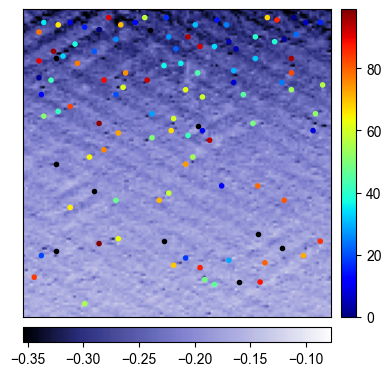

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

tp = topo
c = np.mean(tp)
s = np.std(tp)

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
ax.scatter(seed_coords[:, 1]*1, seed_coords[:, 0]*1, c="k", label="Seed Points", marker=".")
time_order = np.arange(len(acquired_coords[num_seed:step, 1]))  # Create a sequence representing time
im = ax.scatter(acquired_coords[num_seed:step, 1]*1, acquired_coords[num_seed:step, 0]*1, c=time_order, cmap="jet",
                           label="Acquired Points", marker=".")

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# cax.yaxis.set_ticks_position('left')
cbar = fig.colorbar(im, cax=cax)

# cbar.set_label("Acquisition Step", rotation=270, labelpad=15)
cax2 = divider.append_axes("bottom", size="5%", pad=0.1)
# cax2.yaxis.set_ticks_position('top')
fig.colorbar(im_base, cax=cax2, orientation='horizontal')

plt.tight_layout()
# plt.savefig('{}_topo_overview_with_traces_highres.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)

In [ ]:
topos = exp.param['topo_global']

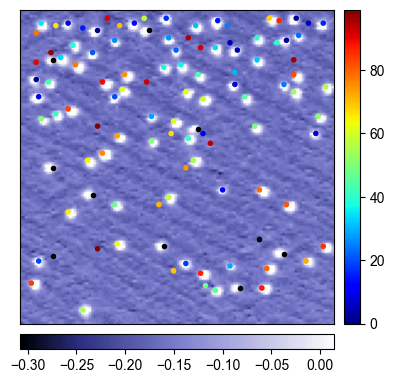

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

tp = topos[-1]
c = np.mean(tp)
s = np.std(tp)

fig, ax = plt.subplots(figsize=[4, 4])
im_base = ax.imshow(tp, origin='lower', clim=[c-3*s, c+3*s], cmap=plt.cm.Blues)
ax.scatter(seed_coords[:, 1]*1, seed_coords[:, 0]*1, c="k", label="Seed Points", marker=".")
time_order = np.arange(len(acquired_coords[num_seed:step, 1]))  # Create a sequence representing time
im = ax.scatter(acquired_coords[num_seed:step, 1]*1, acquired_coords[num_seed:step, 0]*1, c=time_order, cmap="jet",
                           label="Acquired Points", marker=".")

# Turn off axes but keep the frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# cax.yaxis.set_ticks_position('left')
cbar = fig.colorbar(im, cax=cax)

# cbar.set_label("Acquisition Step", rotation=270, labelpad=15)
cax2 = divider.append_axes("bottom", size="5%", pad=0.1)
# cax2.yaxis.set_ticks_position('top')
fig.colorbar(im_base, cax=cax2, orientation='horizontal')

plt.tight_layout()
# plt.savefig('{}_topo_overview_with_traces_highres_last.png'.format(save_name), dpi=400, bbox_inches='tight', pad_inches=0.1)